# About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Features

### Pregnencies:

Pregnancy history of the patient.


### Glucose: 

#### Fasting blood glucose levels in adults: 

Normal Range: Typically, a fasting blood glucose level between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L) is considered normal.

Prediabetes Range: Fasting blood glucose levels between 100 mg/dL (5.6 mmol/L) and 125 mg/dL (6.9 mmol/L) may indicate prediabetes.

Diabetes Range: A fasting blood glucose level of 126 mg/dL (7 mmol/L) or higher on two separate occasions is often used as a diagnostic threshold for diabetes.

#### Postprandial Blood Sugar (PPBS) values:

Normal Range: Typically, a PPBS value below 140 mg/dL (7.8 mmol/L) is considered normal for most individuals. This measurement is often taken 2 hours after a meal.

Prediabetes Range: PPBS values between 140 mg/dL (7.8 mmol/L) and 199 mg/dL (11.0 mmol/L) may indicate prediabetes.

Diabetes Range: A PPBS value of 200 mg/dL (11.1 mmol/L) or higher on two separate occasions is often used as a diagnostic threshold for diabetes.


### Blood Pressure:

The acceptable range of blood pressure values can vary depending on factors such as age, sex, and individual health conditions. Blood pressure is typically measured using two values: systolic pressure (the higher number) and diastolic pressure (the lower number), both measured in millimeters of mercury (mm Hg). Here are general guidelines for blood pressure values:

Normal Blood Pressure: A normal blood pressure reading is usually defined as systolic pressure below 120 mm Hg and diastolic pressure below 80 mm Hg, often written as "120/80 mm Hg."

Elevated Blood Pressure: Elevated blood pressure, sometimes referred to as prehypertension, falls in the range of systolic pressure between 120 and 129 mm Hg and diastolic pressure below 80 mm Hg.

Hypertension Stage 1: Stage 1 hypertension is diagnosed when systolic pressure ranges from 130 to 139 mm Hg or diastolic pressure ranges from 80 to 89 mm Hg.

Hypertension Stage 2: Stage 2 hypertension is diagnosed when systolic pressure is 140 mm Hg or higher, or diastolic pressure is 90 mm Hg or higher.

#### Note: In this dataset only the diastolic pressure(Lower number) is given.


### Skin Thickness:

For adult males and females, the normal range for triceps skinfold thickness can be approximately 10 to 25 millimeters (mm) or more, depending on age and gender. 


### Insulin: 

Fasting insulin levels typically fall within the range of approximately 5 to 15 μU/ml for many individuals.


### Body Mass Index (weight in kg/(height in m)^2):

#### Lower Risk BMI Category:

BMI between 18.5 and 24.9 kg/m^2
This category is associated with a lower risk of weight-related health conditions and is often considered a "healthy" or "good" BMI range for many individuals.

#### Higher Risk BMI Category:

BMI of 25.0 kg/m^2 or higher
This category includes individuals who are classified as overweight or obese and may be at a higher risk for weight-related health issues.


### Diabetes Pedigree Function:

The "Diabetes Pedigree Function" in the dataset likely quantifies the genetic predisposition to diabetes based on family history.


### Age:

Age of the individual


### Outcome:

0: The person is "not diabetic"
1: The person is "diabetic"


In [1]:
# Importing required Libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')

In [3]:
# Columns present in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Checking the first 10 rows
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
# Checking the last 10 rows
df.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
# Checking the number of rows and columns.

print('Total number of observations/rows are:', df.shape[0])
print('Total number of features/columns are:', df.shape[1])

Total number of observations/rows are: 768
Total number of features/columns are: 9


In [7]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [9]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df.columns:
    print('*'*50,i,'*'*50)
    print()
    print(set(df[i].to_list()))
    print()

************************************************** Pregnancies **************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

************************************************** Glucose **************************************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

************************************************** BloodPressure ******

In [10]:
# As we can see above there are 0 values(minimum) for certain features, but there cannot be a minimum value of 0 for Glucose, 
# Blood Pressure, Skin Thickness and BMI, hence this needs to be treated before we move ahead with the analysis

In [11]:
# Imputing median values for all the 0 values present in features: Glucose, Blood Pressure, Skin Thickness and BMI
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].median(), inplace=True)

In [12]:
# After fixing the above discrepancy:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.656250   30.438286  44.000  99.75000   
BloodPressure             768.0   72.386719   12.096642  24.000  64.00000   
SkinThickness             768.0   27.334635    9.229014   7.000  23.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   32.450911    6.875366  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

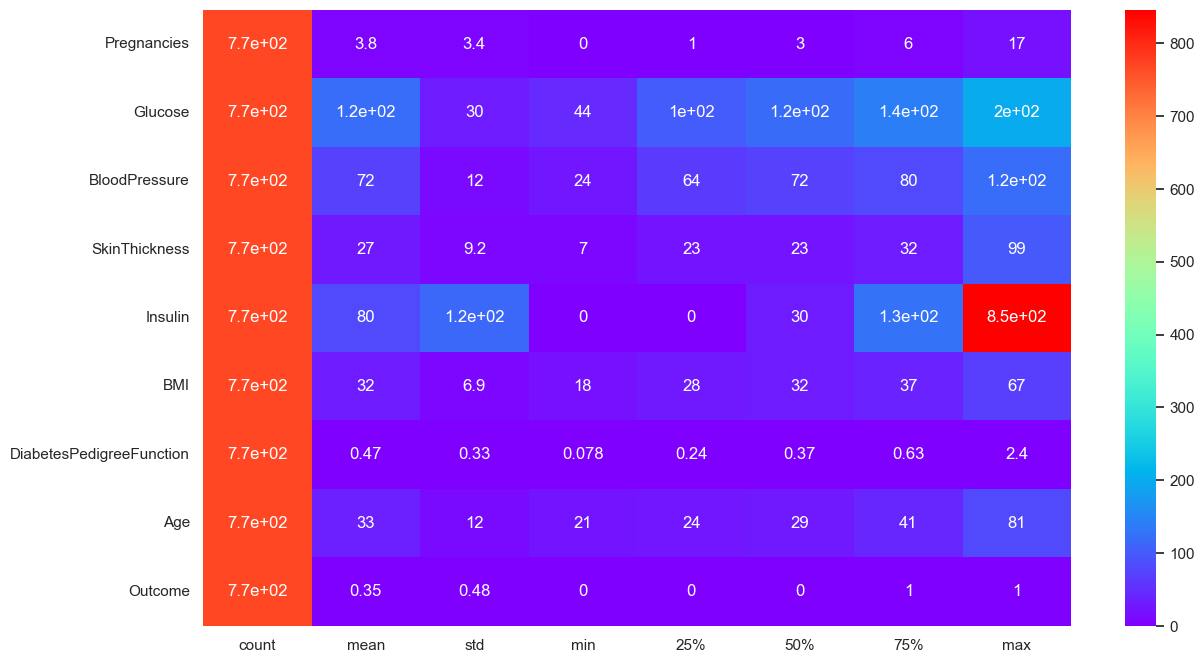

In [13]:
# Getting to know the distribution of each variable visually:

plt.figure(figsize=(14,8))
sns.heatmap(df.describe().T, annot= True, cmap='rainbow')
plt.show()

# Exploratory Data Analysis

## Univariate Analysis of the features

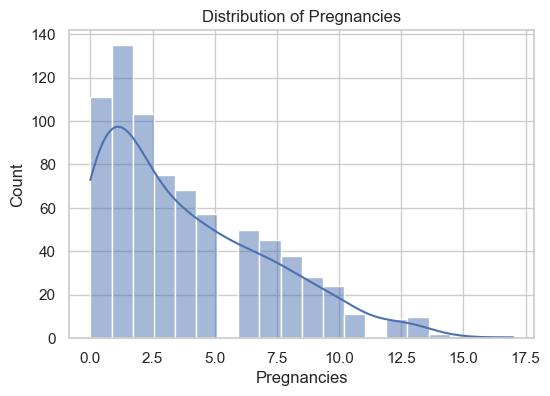

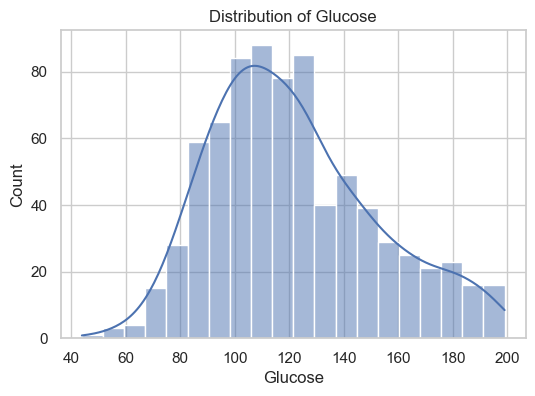

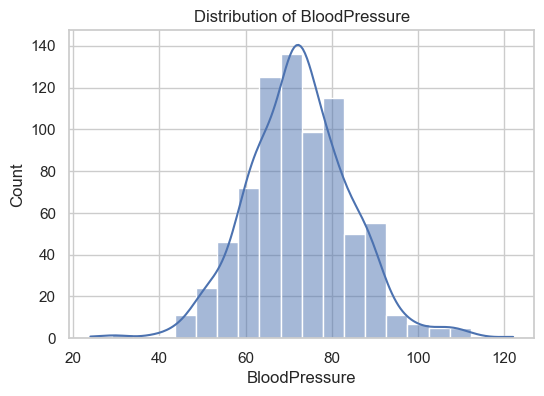

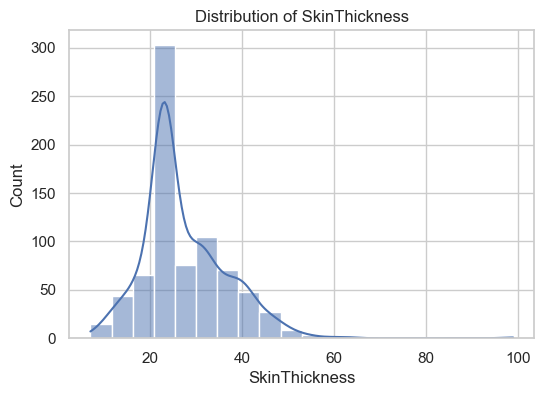

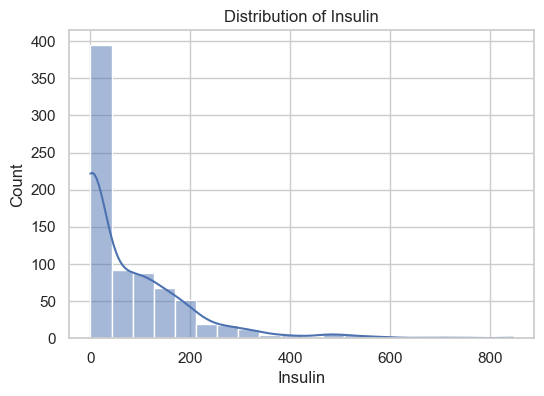

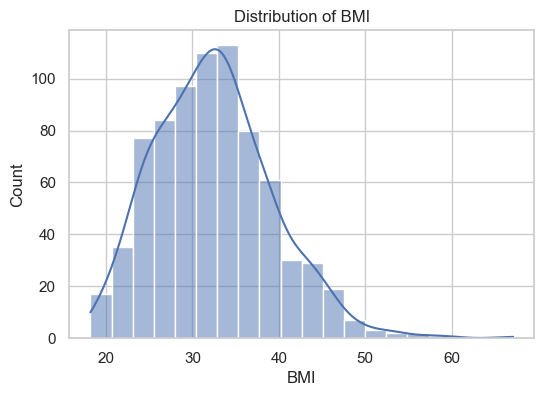

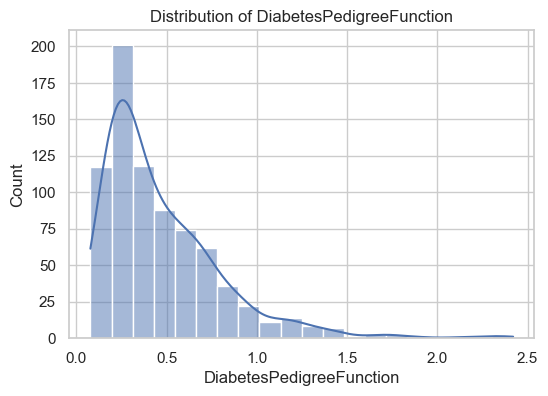

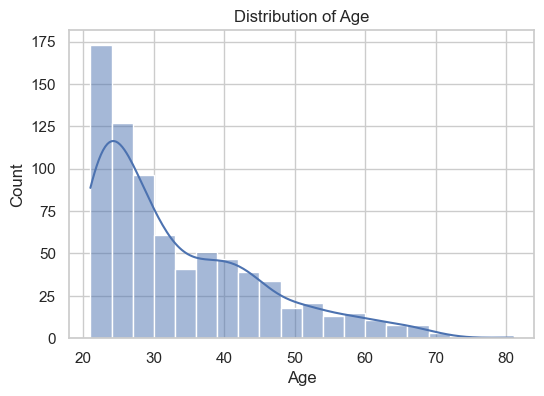

In [14]:
# Checking how the features are distributed

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns[:-1]
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

It is observed that only Glucose and Blood pressure features are normally distributed and all the other features are right skewed.

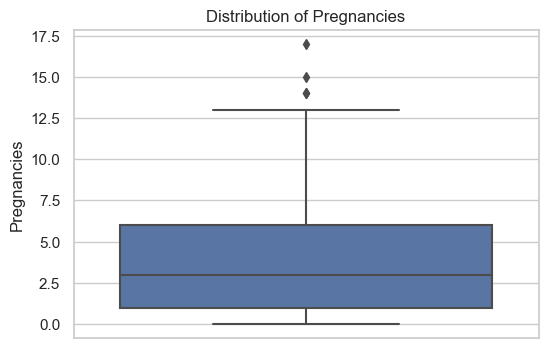

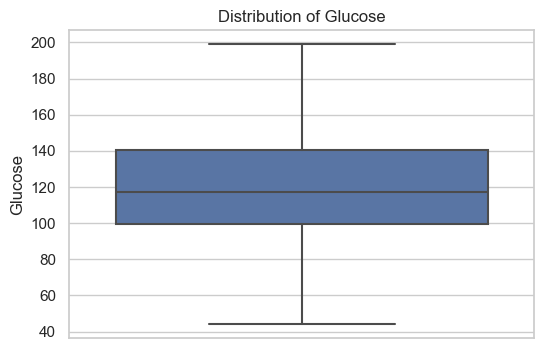

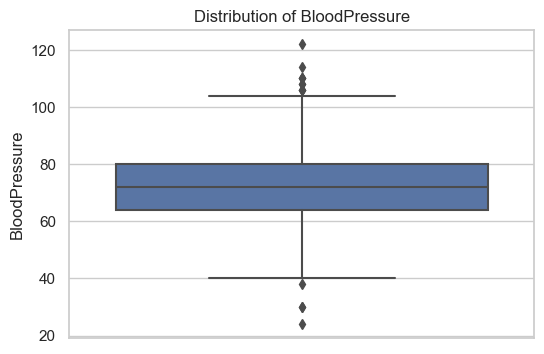

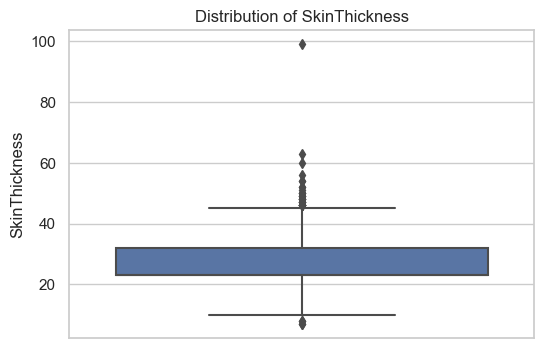

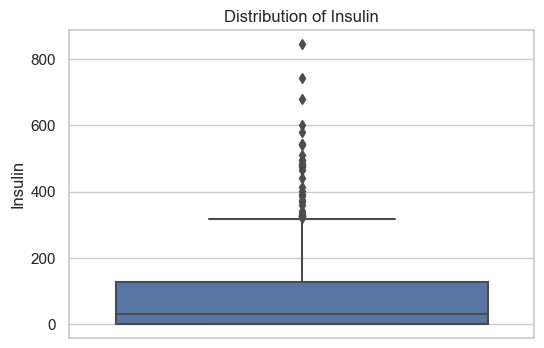

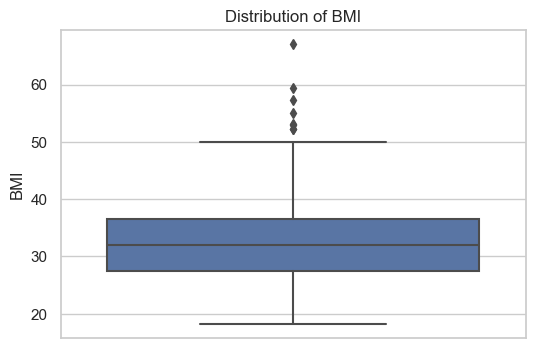

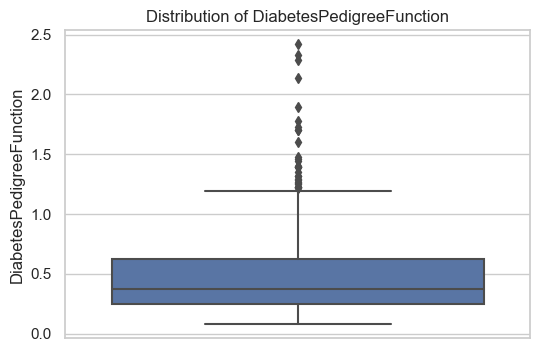

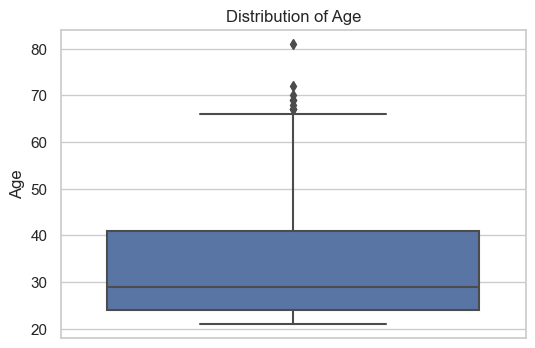

In [15]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns[:-1]
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

There is clearly presence of outliers in most of the features, however the same will not be treated/handled as this is a medical dataset and all values that are outlying are realistic

## Bi-variate Analysis

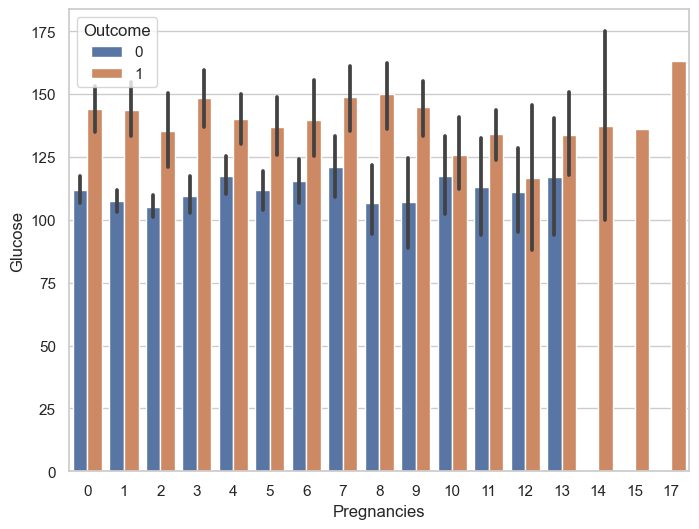

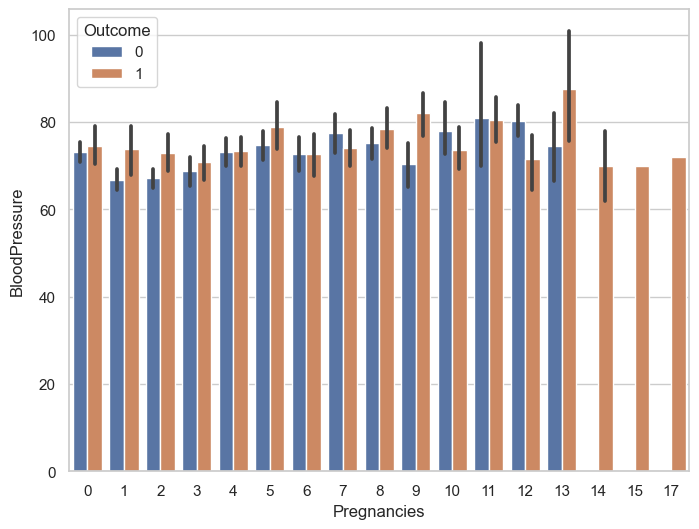

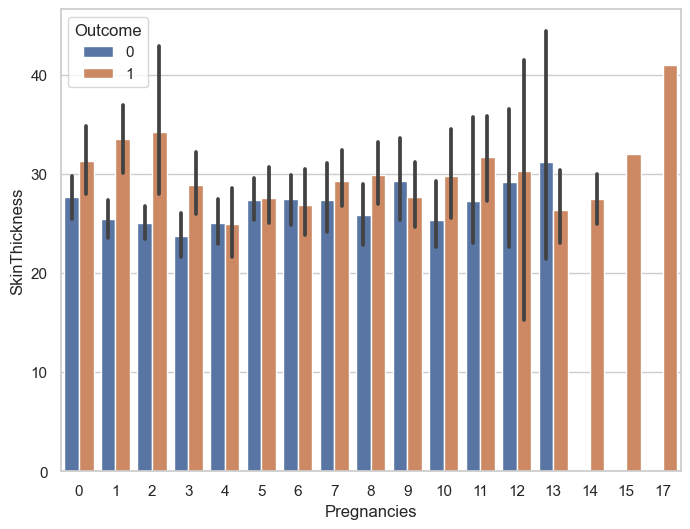

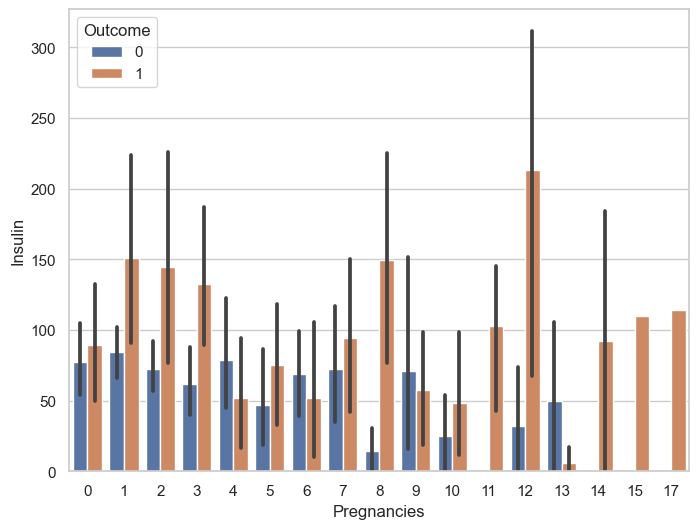

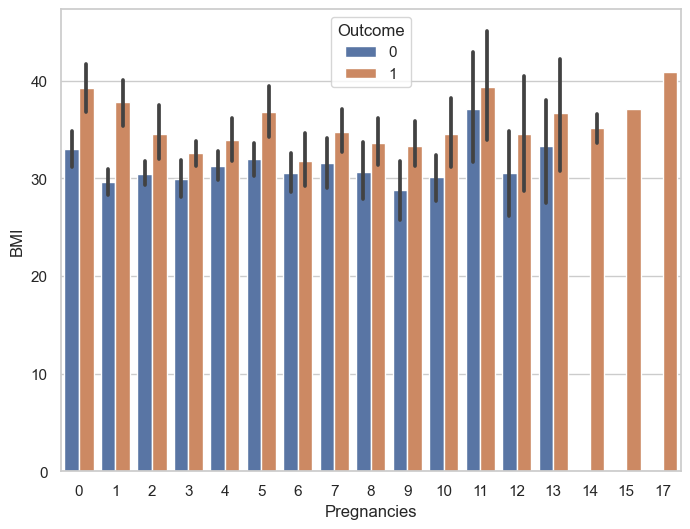

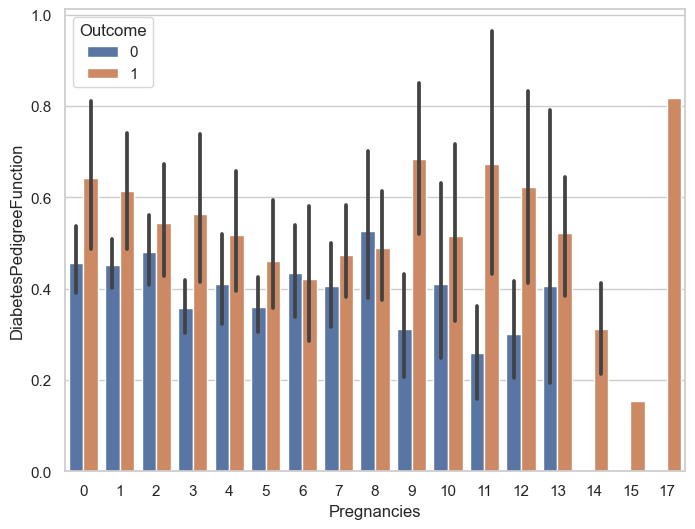

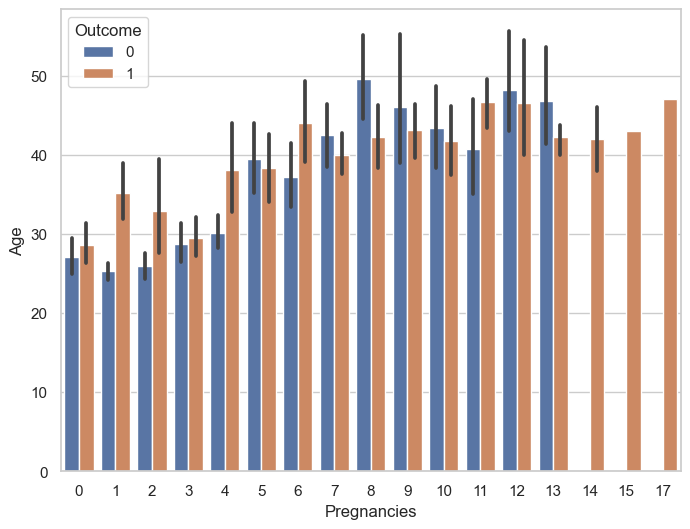

In [16]:
for y in df.drop(['Outcome', 'Pregnancies'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x='Pregnancies', y= y, hue='Outcome')
    plt.show()

It is observed that BMI is a significant contributor to predicting whether a person is diabetic or not and in the dataset individuals with 14 and higher number of pregnancies is seen to have diabetics

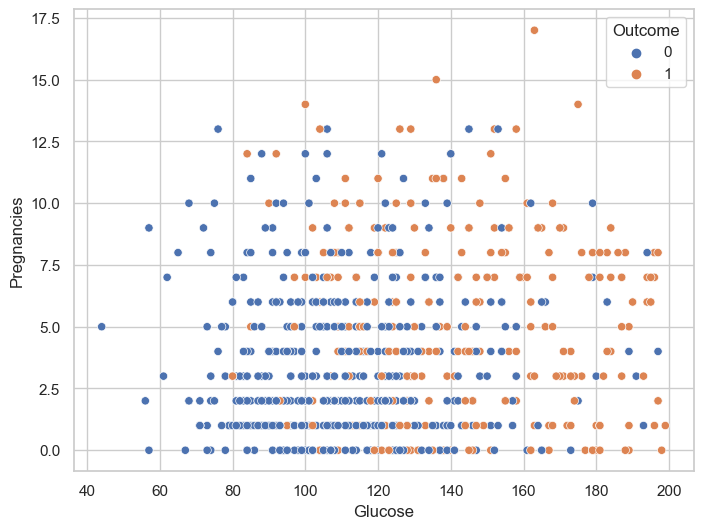

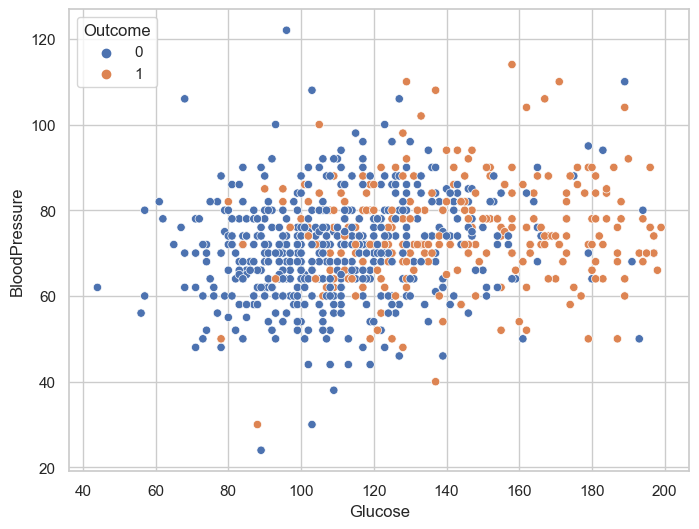

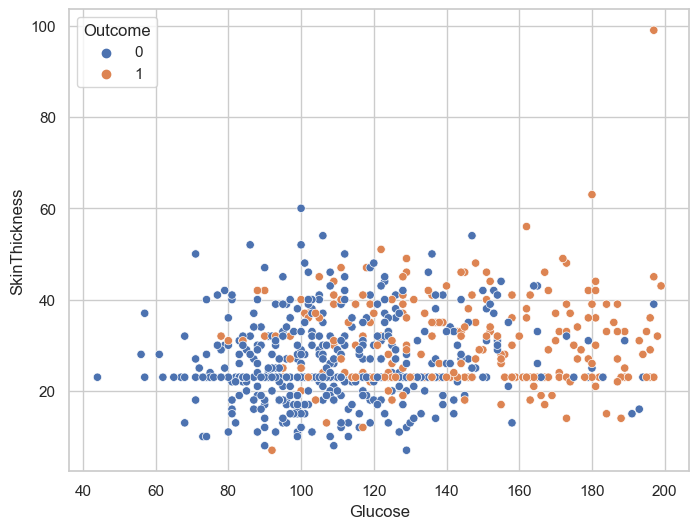

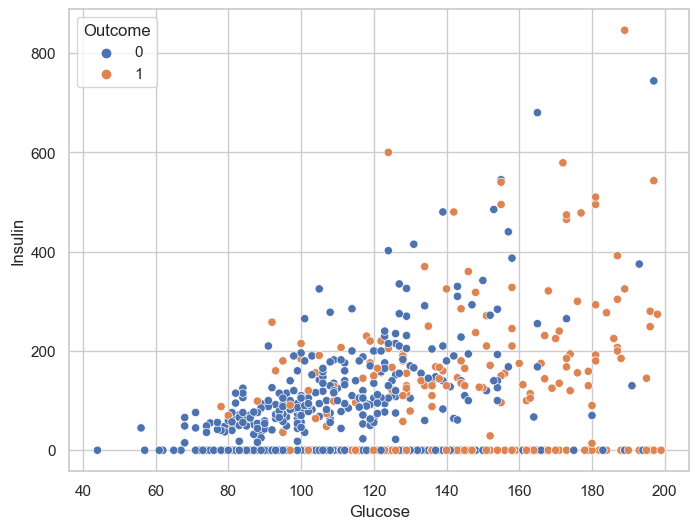

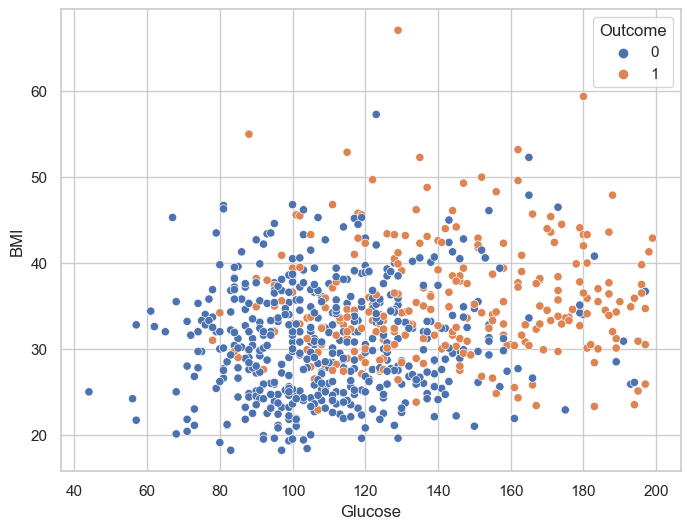

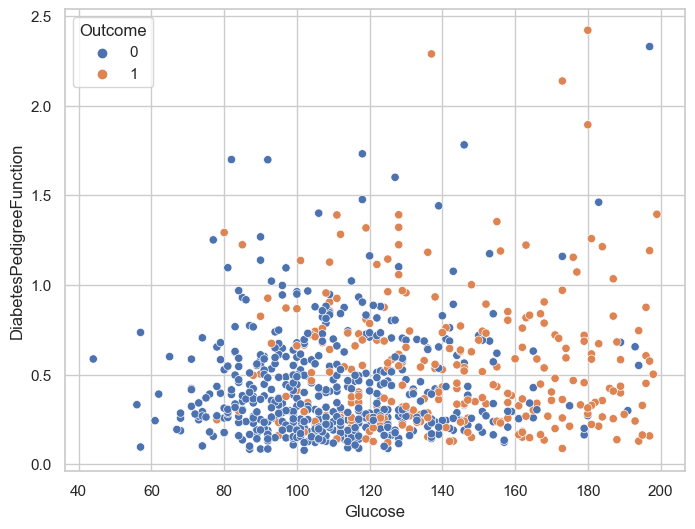

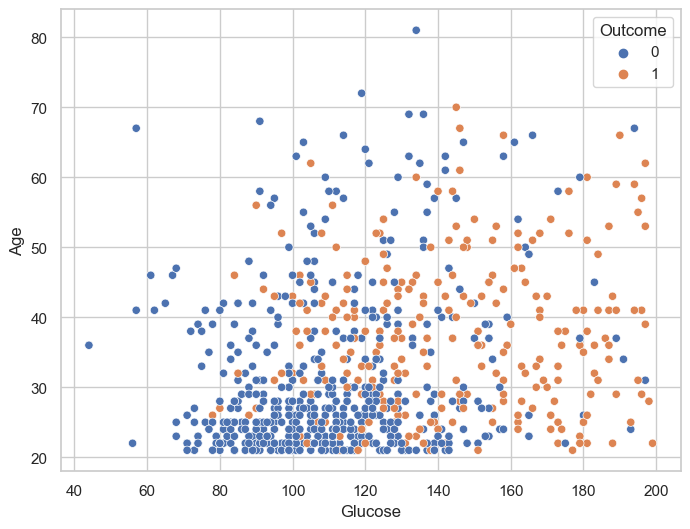

In [17]:
for y in df.drop(['Outcome', 'Glucose'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Glucose', y= y, hue='Outcome')
    plt.show()

It is clearly seen that Glucose plays a very significant role in predicting if an individual is diabetic or not as the values can be clearly distinguished, it is also observed that individuals with lower levels of diabetes pedigree function are also diabetic which means there are also more factors affecting which makes a person diabetic other than the likelihood of parental or ancestral genetic inheritence

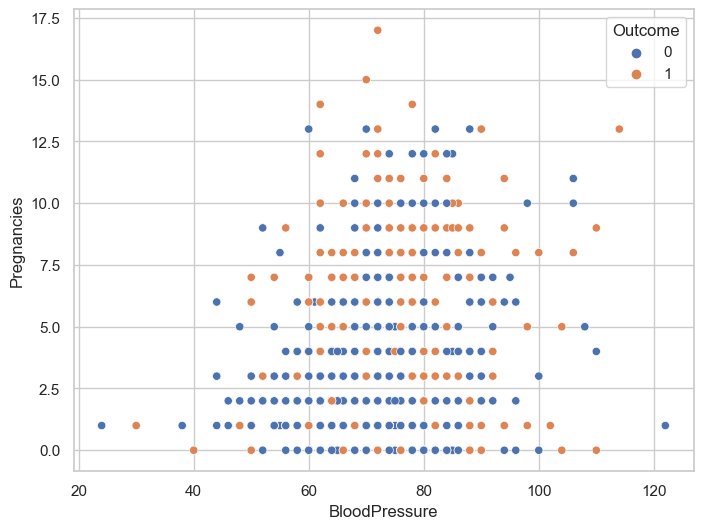

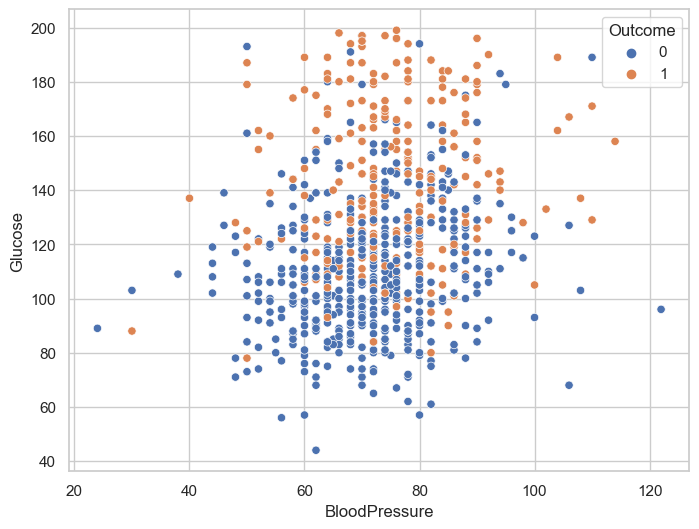

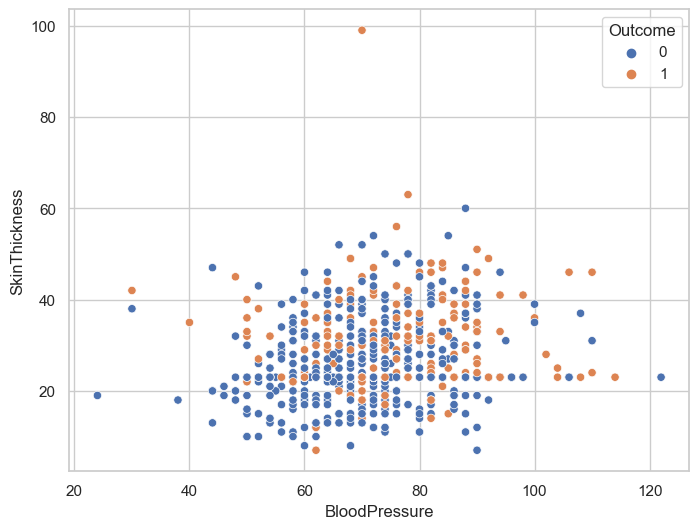

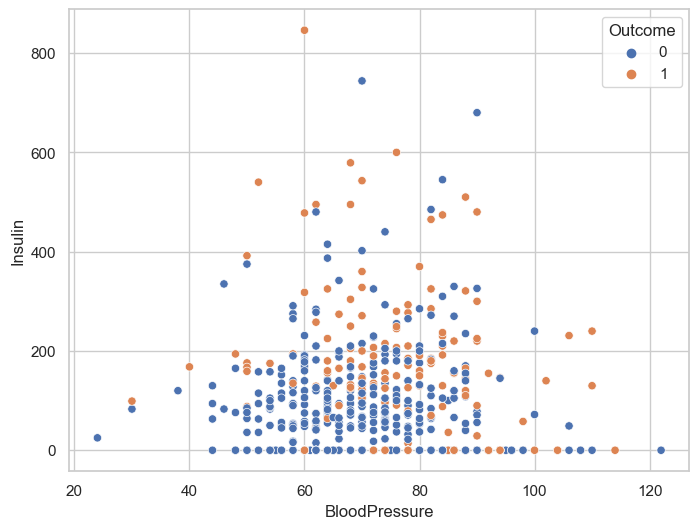

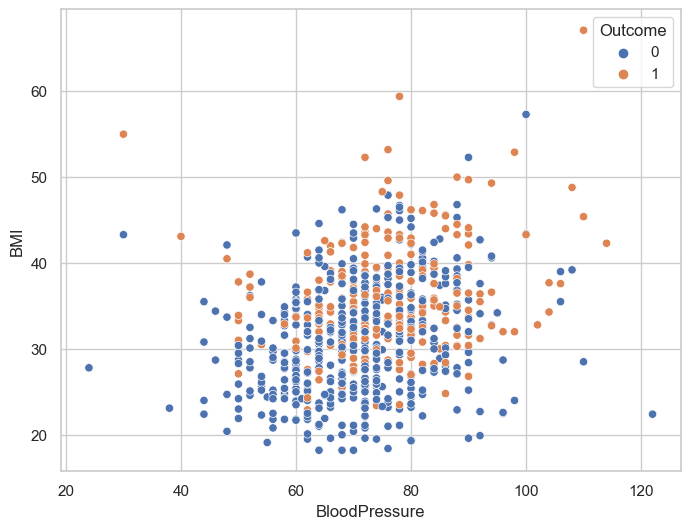

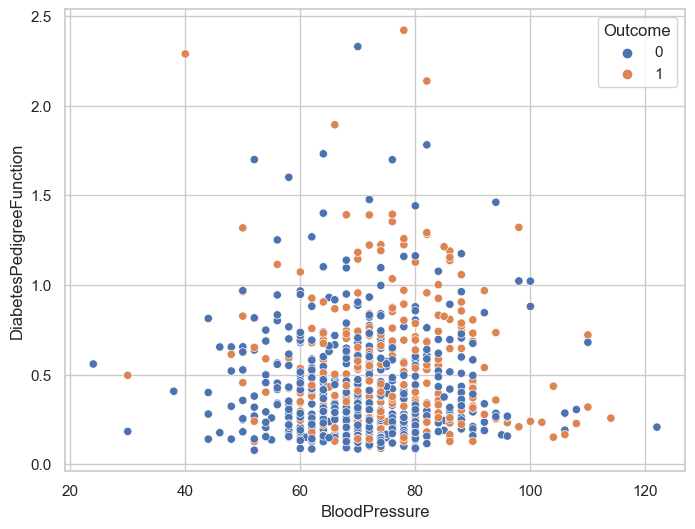

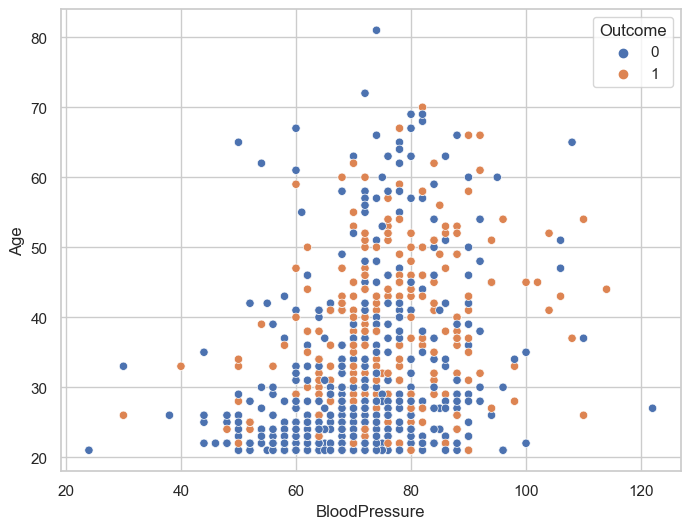

In [18]:
for y in df.drop(['Outcome', 'BloodPressure'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='BloodPressure', y= y, hue='Outcome')
    plt.show()

We cannot clearly distinguish if the person is diabetic or not with respect to the blood pressure

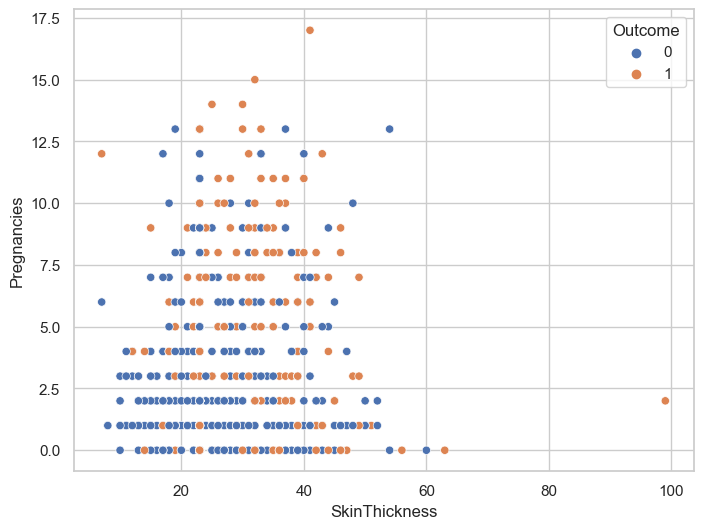

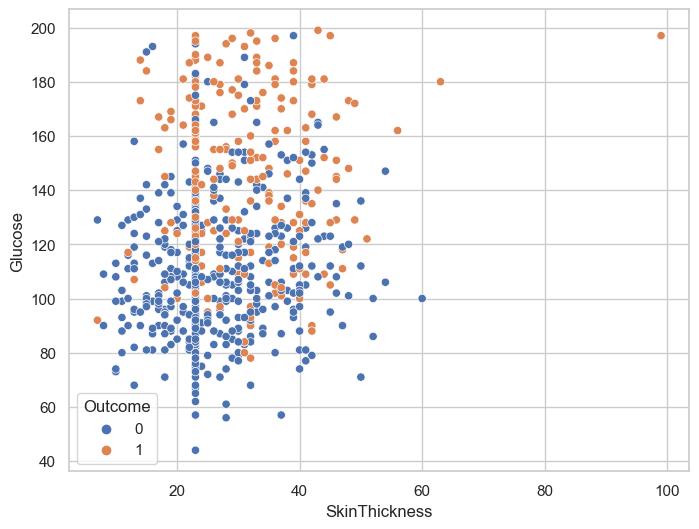

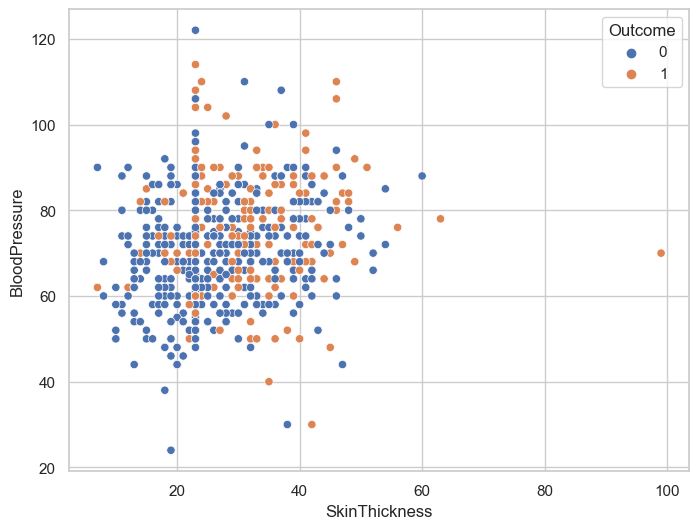

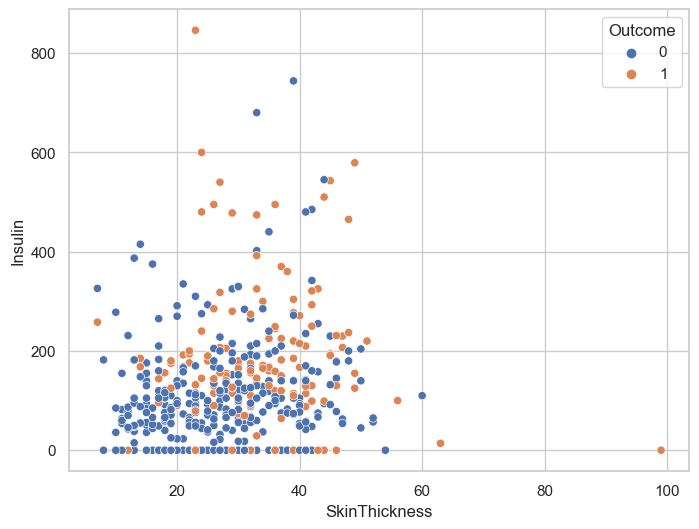

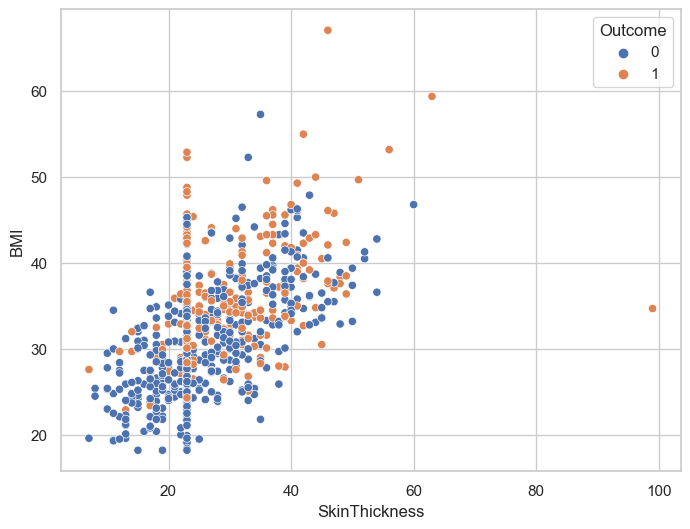

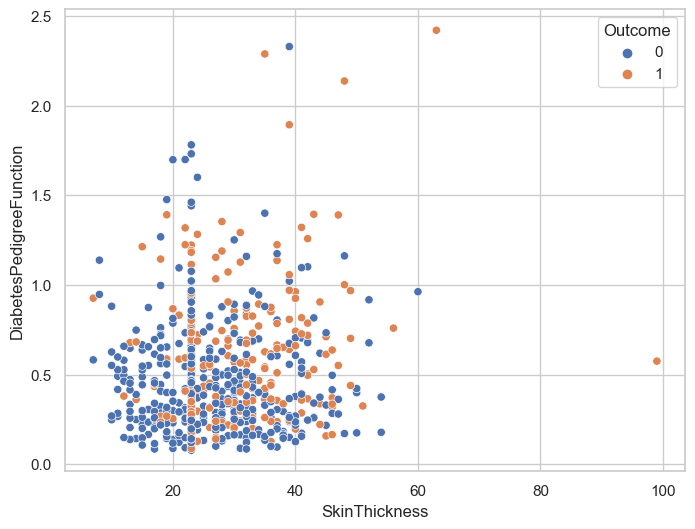

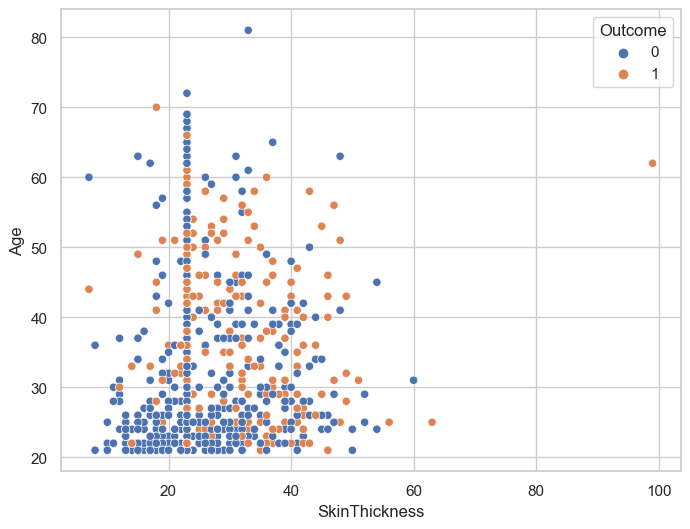

In [19]:
for y in df.drop(['Outcome', 'SkinThickness'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='SkinThickness', y= y, hue='Outcome')
    plt.show()

It is observed that the individuals with skin thickness (Triceps skin fold thickness (mm)) greater than 20 mm are more prone to being diabetic.

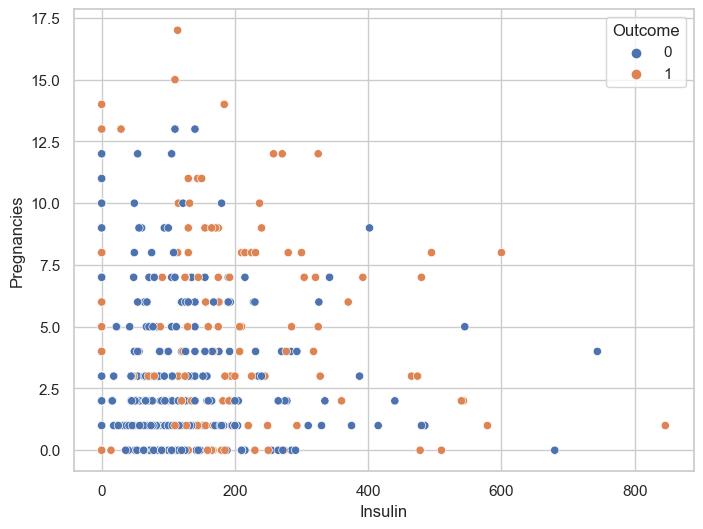

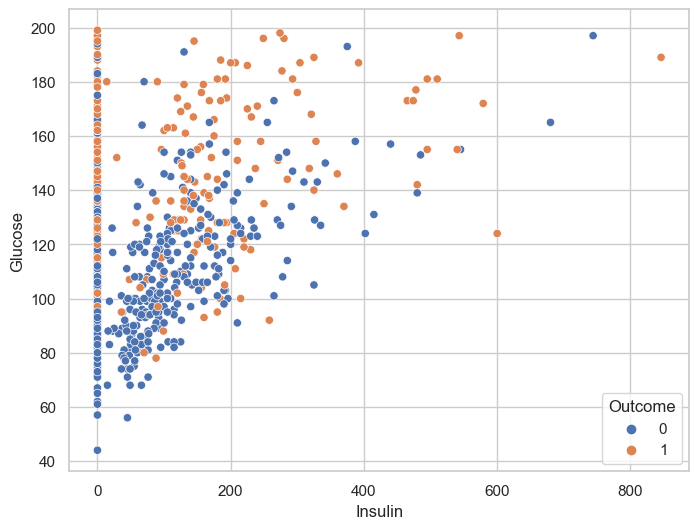

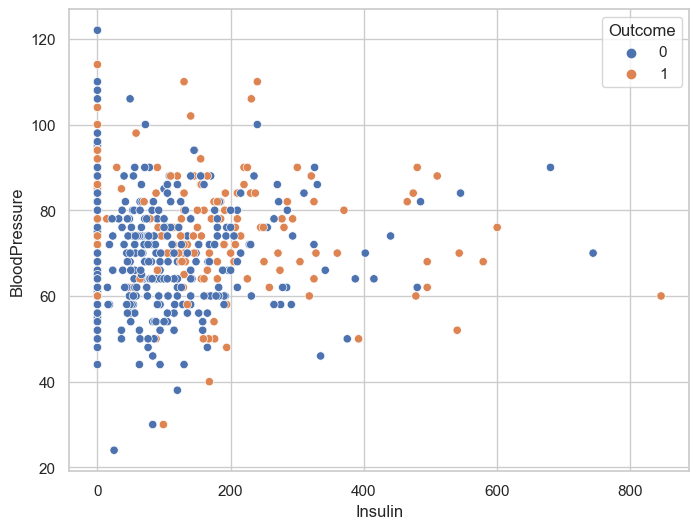

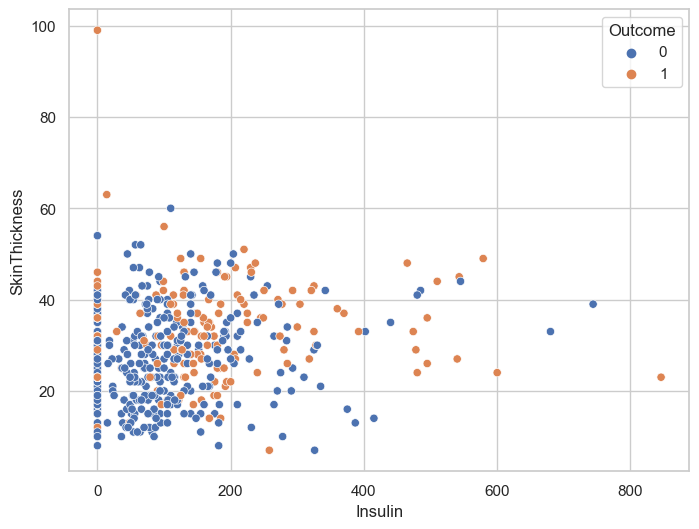

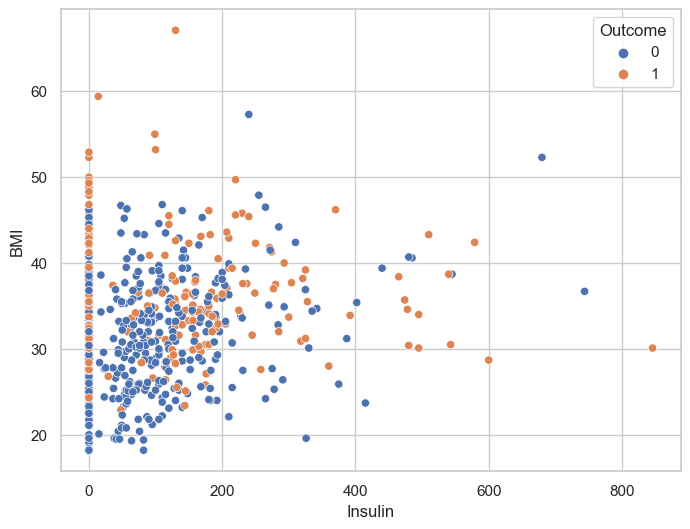

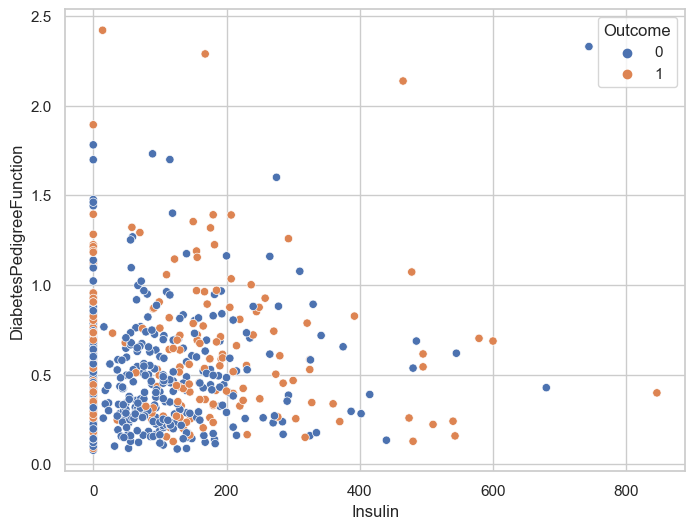

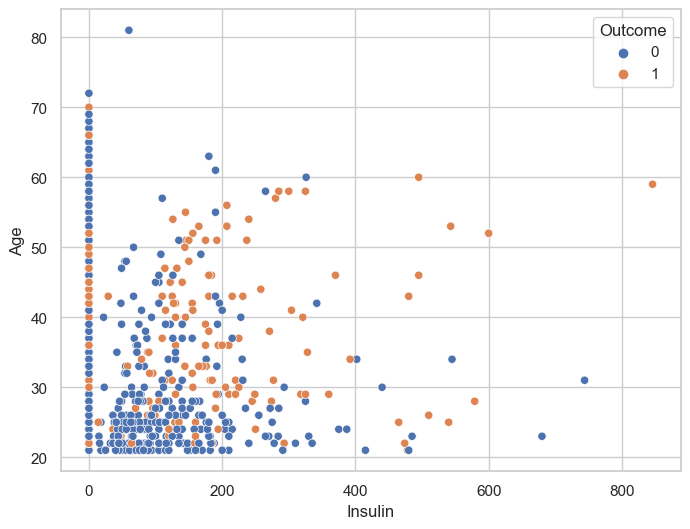

In [20]:
for y in df.drop(['Outcome', 'Insulin'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Insulin', y= y, hue='Outcome')
    plt.show()

Individuals are diabetic with all the range of insulin values

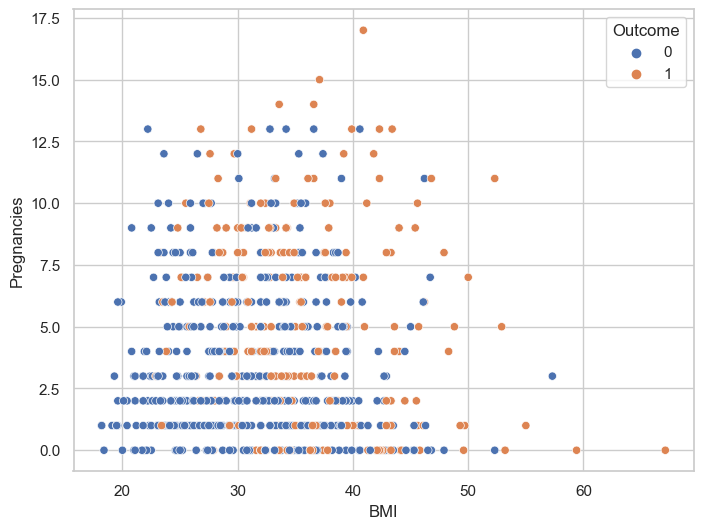

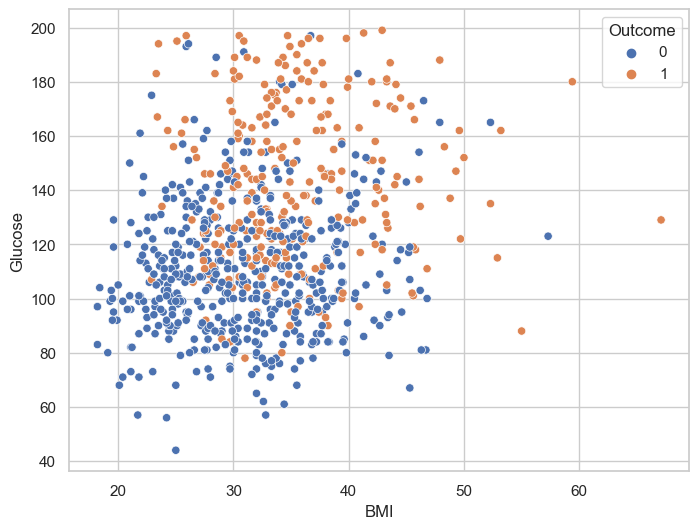

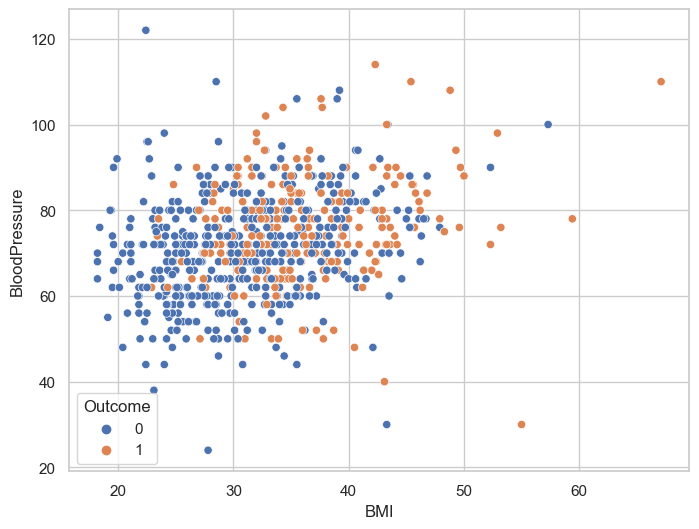

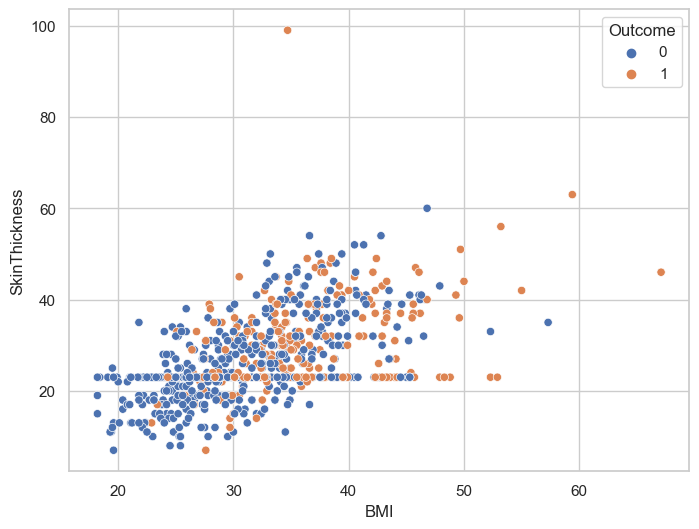

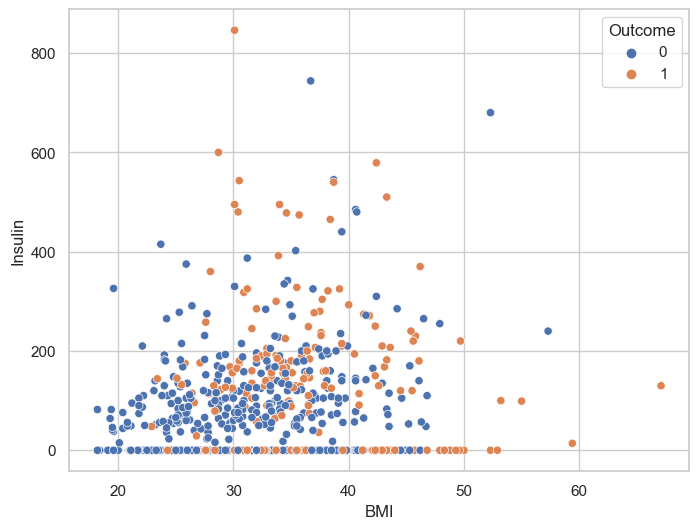

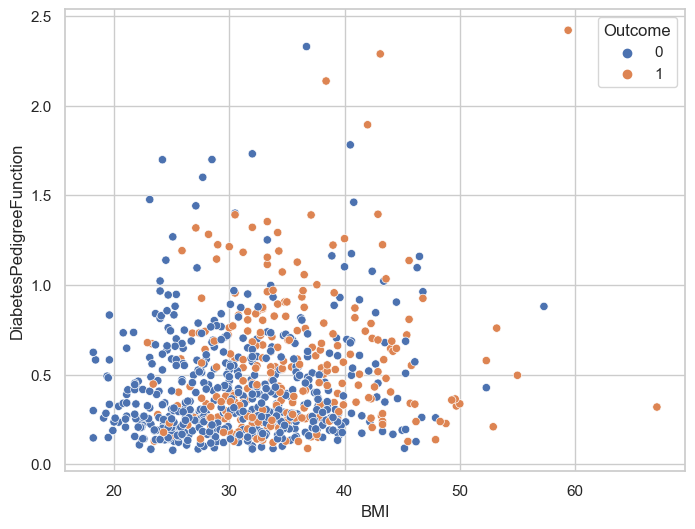

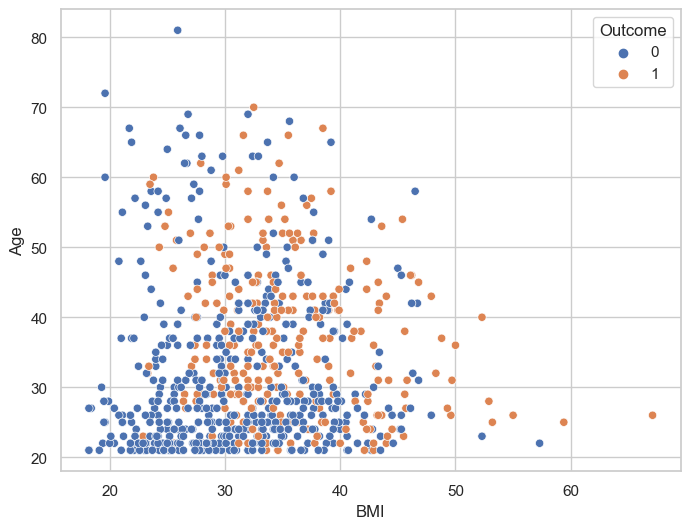

In [21]:
for y in df.drop(['Outcome', 'BMI'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='BMI', y= y, hue='Outcome')
    plt.show()

Individuals with BMI values greater than 25 are seen to be diabetic.

It is also seen that there is a slight increase in BMI with increase in pregnancies, which might lead the individual to become more prone to being diabetic with increase in pregnancy.

Observed that the skin thickness has a clear positive relationship with the BMI

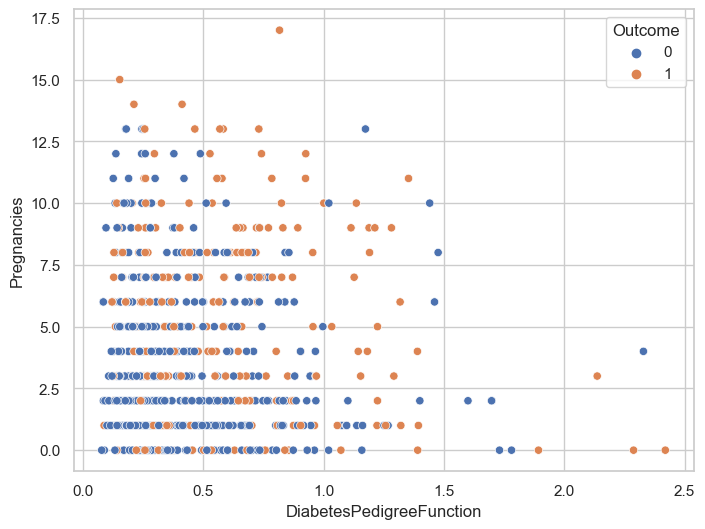

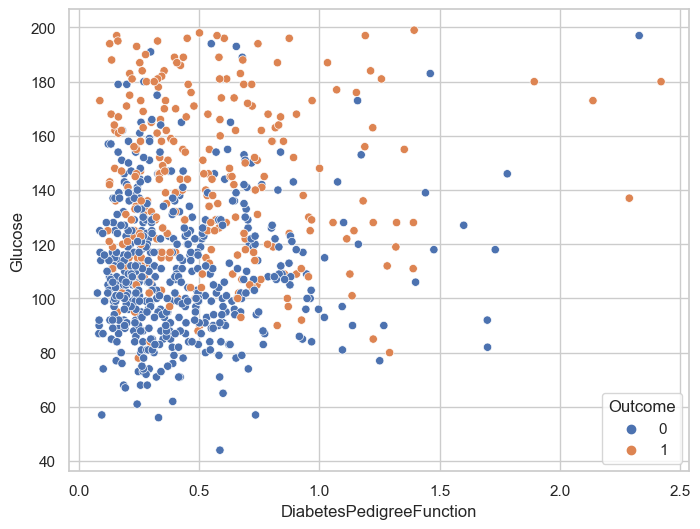

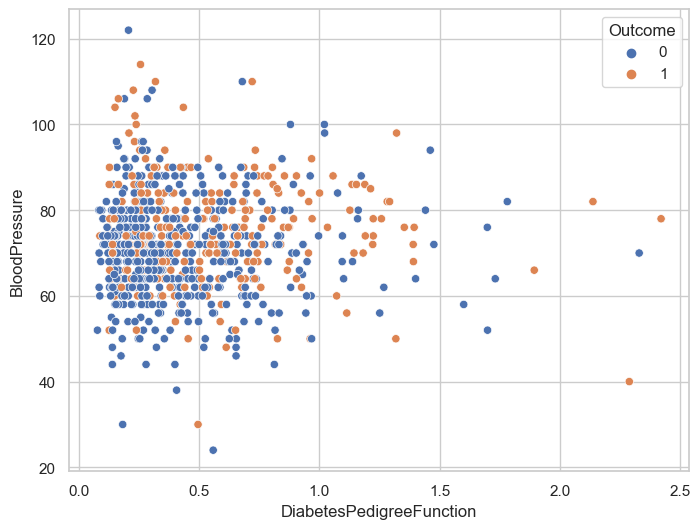

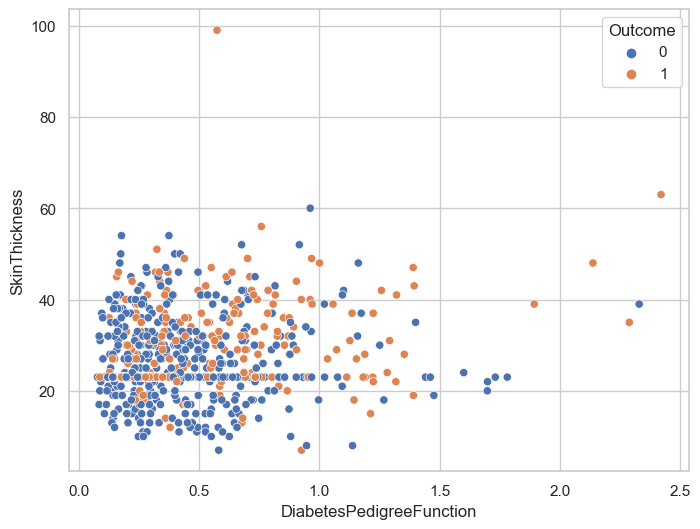

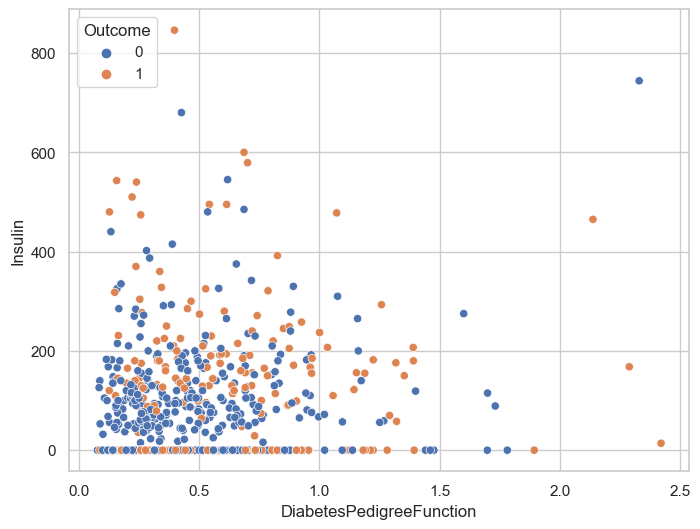

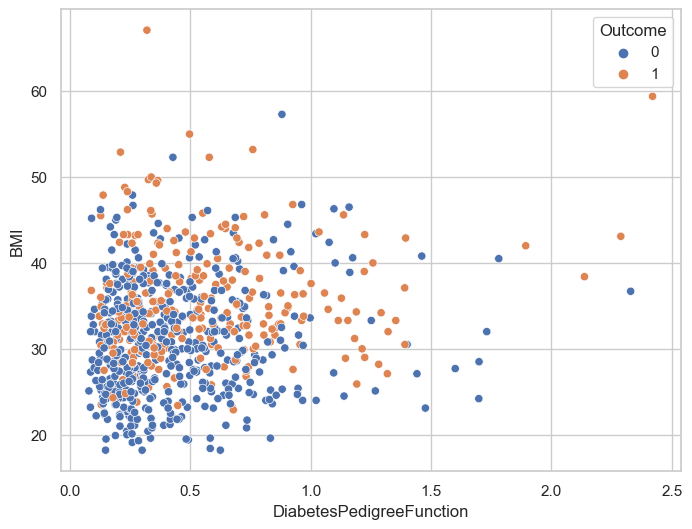

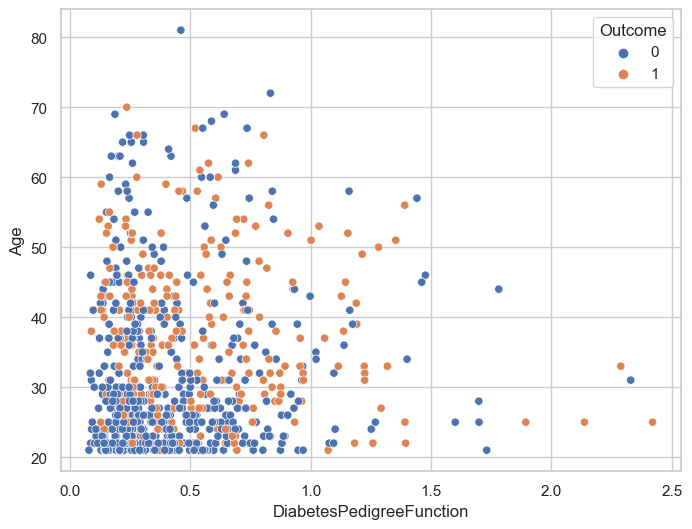

In [22]:
for y in df.drop(['Outcome', 'DiabetesPedigreeFunction'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='DiabetesPedigreeFunction', y= y, hue='Outcome')
    plt.show()

As said earlier individuals with as less as 0.1 values of Diabetes Pedigree Function are seen to be diabetic, hence it is not that a significant factor alone in predicting an individual's chance of being diabetic.

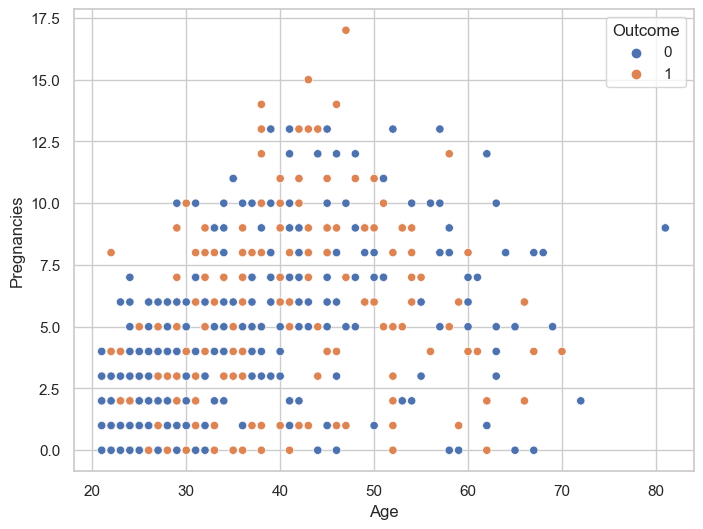

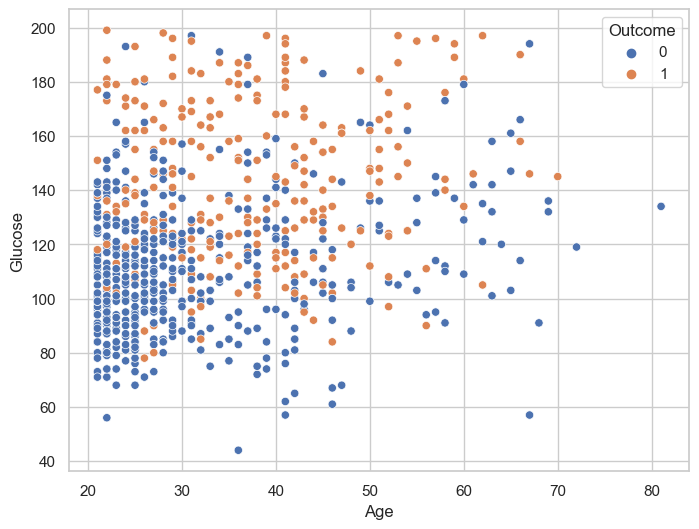

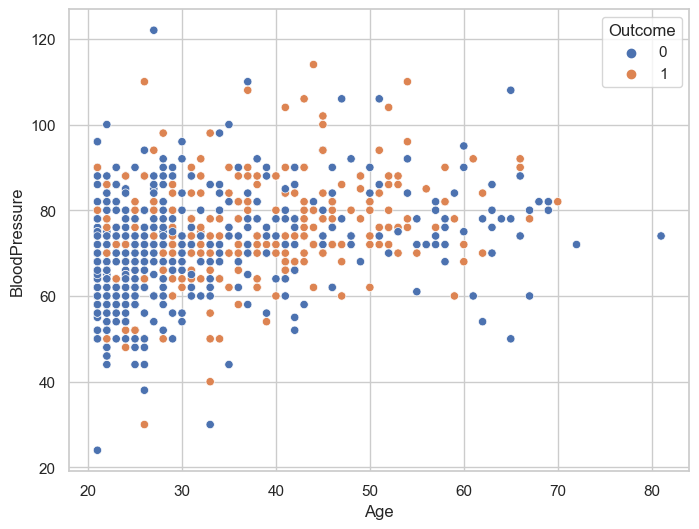

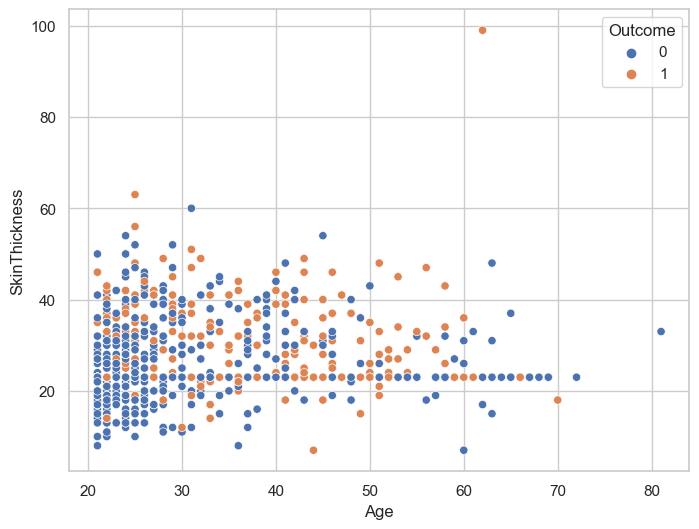

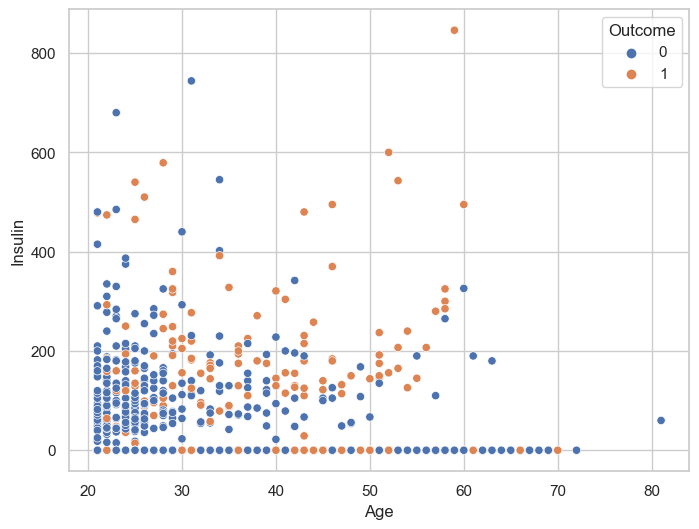

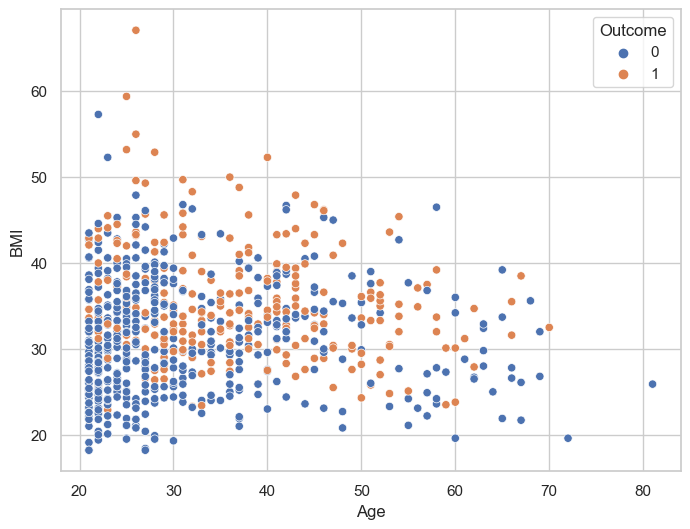

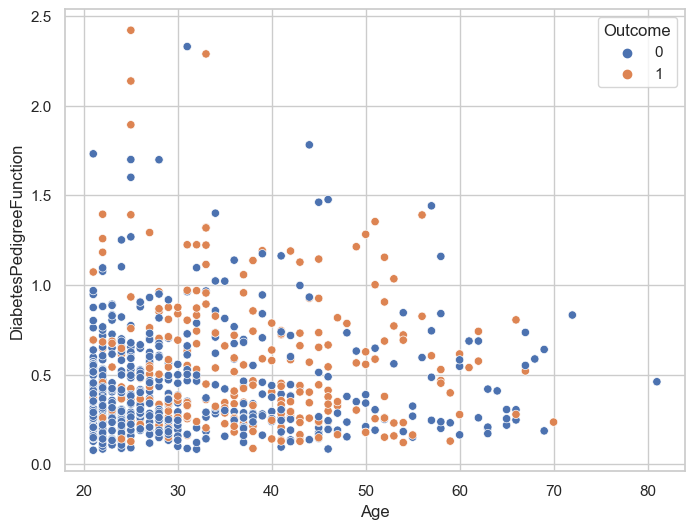

In [23]:
for y in df.drop(['Outcome', 'Age'], axis=1).columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Age', y= y, hue='Outcome')
    plt.show()

Diabetes is seen in individuals with all ranges of age.

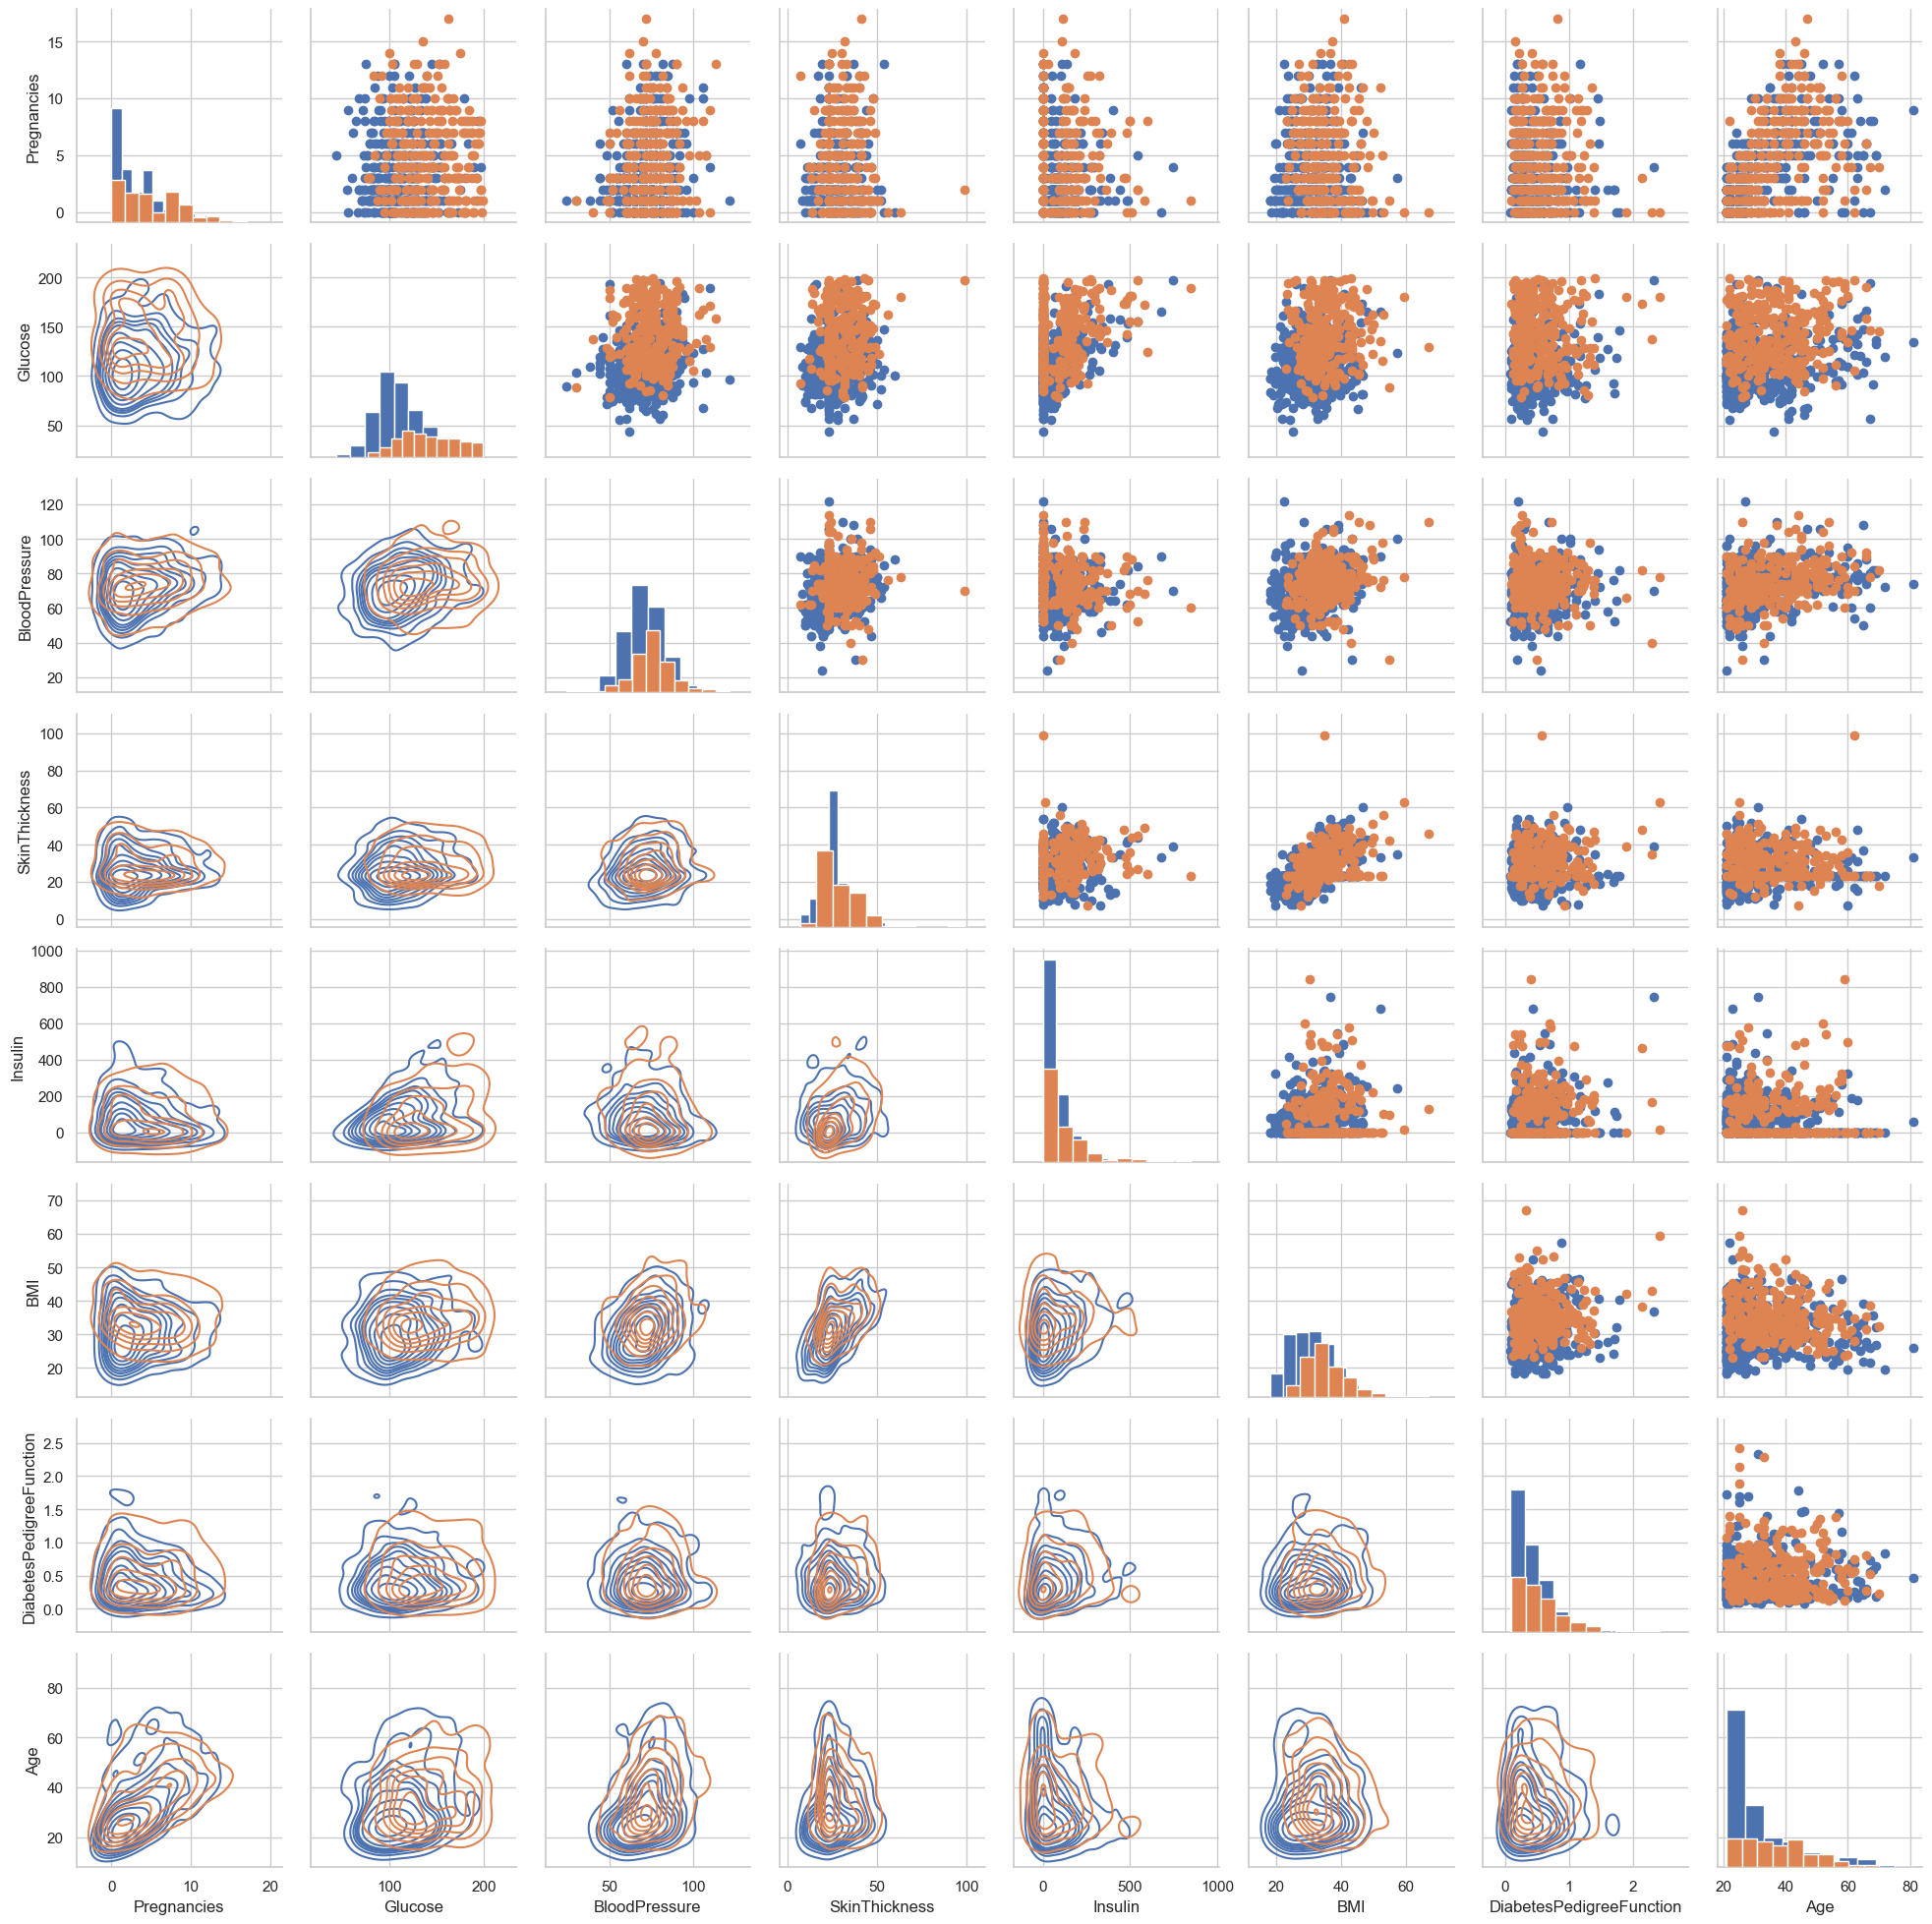

In [24]:
g = sns.PairGrid(df, hue='Outcome')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

## Multivariate Analysis

In [25]:
# Checking the correlation matrix.

df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.073535  0.331709      -0.045769       0.244250   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.021546                 -0.033523   
Glucose                   0.331709  0.231400                  0.137327   
BloodPressure            -0.045769  0.281132                 -0.002378   
SkinThickness             0.244250  0.546951                  0.142977   
Insulin                   1.000000  0.185356                  0.185071   
BMI                       0.185356  1.000000                  0.153506   
DiabetesPedigreeFunction  0.185071  0.153506                  1.000000   
Age                      -0.042163  0.025744                  0.033561   
Outcome                   0.130548  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.042163  0.130548  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

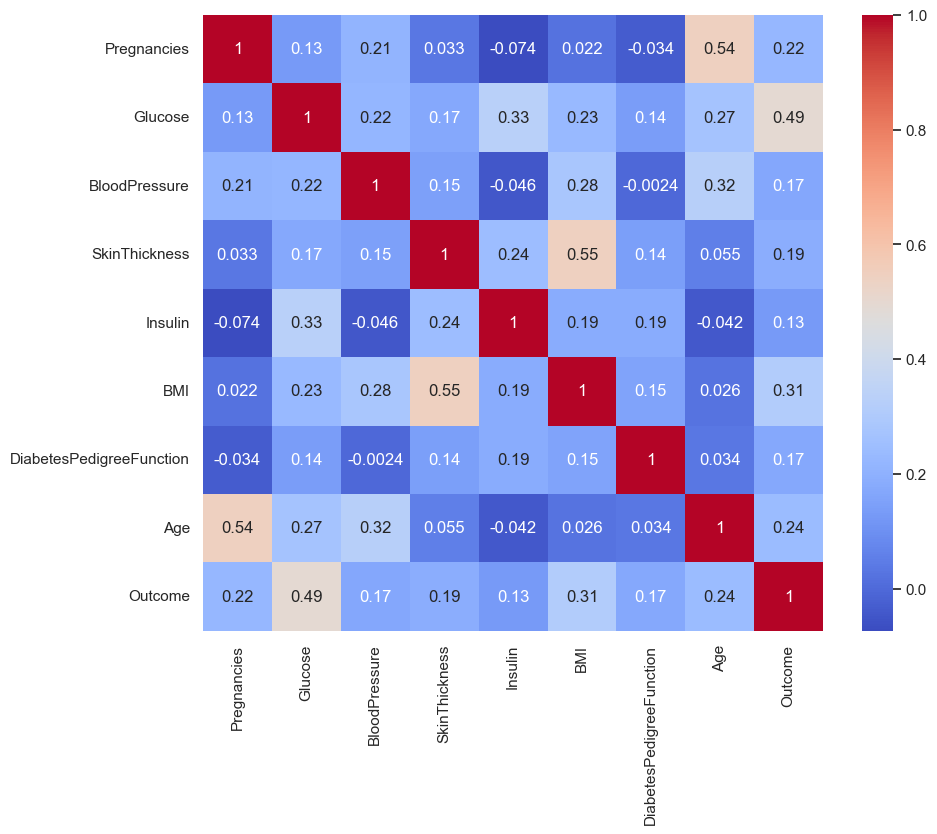

In [26]:
# The same can be visualised in the form of a heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

# Data Preprocessing

## Handling missing values

In [27]:
# Checking what percent of values are missing in each feature.

pd.DataFrame(data=df.isnull().sum()/len(df)*100, columns=['Missing value %'], index = df.columns)

Missing value %
Pregnancies                           0.0
Glucose                               0.0
BloodPressure                         0.0
SkinThickness                         0.0
Insulin                               0.0
BMI                                   0.0
DiabetesPedigreeFunction              0.0
Age                                   0.0
Outcome                               0.0

The missing values which were present as 0s in some features are already taken care of.

Label encoding is not required as all the features are of numerical datatype.

In [28]:
pd.DataFrame(data=df.dtypes, columns=['Data type'], index = df.columns)

Data type
Pregnancies                  int64
Glucose                      int64
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                        float64
DiabetesPedigreeFunction   float64
Age                          int64
Outcome                      int64

## Handling Outliers

Since this is a medical dataset, the outliers will not be treated as all values are important and contribute to the predictability of the model and all the outlying values are realistic.

In [29]:
# Copying the dataset as df_model for further steps in order to retain the initial dataset features.

df_model = df.copy()

## Feature Scaling

In [30]:
x = df_model.drop('Outcome', axis=1)
y = df_model['Outcome']

In [31]:
# Scaling is done in order to check multi collinearity using VIF.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.2,random_state=42)

# Imbalance Treatment of the Output variable

In [34]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Here since (minority value)x2 i.e 268x2 is greater than majority value i.e 500(Non Diabetic) the dataset can be said to have slightly imbalance, however this imbalance will not be handled.

In [35]:
# importing necessary models from sklearn for model building:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Importing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [36]:
# Building Binary classification Logistic regression model.

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [37]:
print("Train classification report:", classification_report(y_train, y_pred_train_logit))
print(confusion_matrix(y_train, y_pred_train_logit))
print("Train accuracy score:",accuracy_score(y_train, y_pred_train_logit))

Train classification report:               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614

[[354  47]
 [ 94 119]]
Train accuracy score: 0.7703583061889251


In [38]:
print("Test classification report:", classification_report(y_test, y_pred_test_logit))
print(confusion_matrix(y_test, y_pred_test_logit))
print("Test accuracy score:",accuracy_score(y_test, y_pred_test_logit))

Test classification report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

[[82 17]
 [19 36]]
Test accuracy score: 0.7662337662337663


In [39]:
# Using elbow method to find the best n_neighbors value:
error_rate = []

for i in range(1,51):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train, y_train)
    pred = knn_model.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

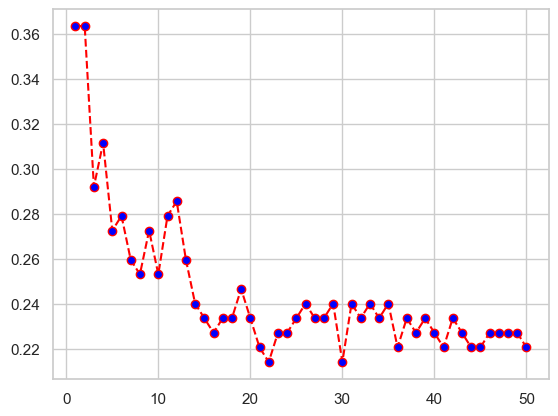

In [40]:
plt.plot(range(1,51), error_rate, color='red', ls='dashed', marker = 'o', markerfacecolor = 'blue')
plt.show()

The best n_neighbor value is 22 as per the elbow curve

In [41]:
# Building KNN classification model.

knn = KNeighborsClassifier(n_neighbors=22, weights='uniform',p=2)
knn.fit(x_train, y_train)
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [42]:
print("Train classification report:", classification_report(y_train, y_pred_train_knn))
print(confusion_matrix(y_train, y_pred_train_knn))
print("Train Accuracy Score:",accuracy_score(y_train, y_pred_train_knn))

Train classification report:               precision    recall  f1-score   support

           0       0.79      0.94      0.86       401
           1       0.81      0.54      0.65       213

    accuracy                           0.80       614
   macro avg       0.80      0.74      0.75       614
weighted avg       0.80      0.80      0.78       614

[[375  26]
 [ 99 114]]
Train Accuracy Score: 0.7964169381107492


In [43]:
print("Test classification report:", classification_report(y_test, y_pred_test_knn))
print(confusion_matrix(y_test, y_pred_test_knn))
print("Test accuracy score:",accuracy_score(y_test, y_pred_test_knn))

Test classification report:               precision    recall  f1-score   support

           0       0.79      0.91      0.85        99
           1       0.78      0.56      0.65        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

[[90  9]
 [24 31]]
Test accuracy score: 0.7857142857142857


In [44]:
train_accuracy = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10, scoring='accuracy')
test_accuracy = cross_val_score(estimator=knn, X=x_test, y=y_test, cv=10, scoring='accuracy')
print(np.mean(train_accuracy))
print(np.mean(test_accuracy))

0.760735060814384
0.7550000000000001


In [45]:
# Hyper Parameter Tuning using Random Forest

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [47]:
n_estimators=[20,60,100,200,500]
max_depth=[None,2,4,6,8]
max_features=['auto','sqrt','log2']
min_samples_split=[2,4,6,8,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]
max_samples=[0.5,0.75,1,2]

param_grid = {'n_estimators':n_estimators, 'max_depth':max_depth, 'max_features':max_features, 'bootstrap': bootstrap,
             'max_samples':max_samples, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

rfc_ht = RandomForestClassifier()
rfc_gridcv = RandomizedSearchCV(rfc_ht, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)
rfc_gridcv.fit(x_train,y_train)
print("Best Score",rfc_gridcv.best_score_)
print("Best Parameters",rfc_gridcv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score 0.6530987604958016
Best Parameters {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_samples': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}


In [48]:
rfc = RandomForestClassifier(n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_samples = 0.75,
max_features='log2', max_depth=4, bootstrap=True, random_state=42)
rfc.fit(x_train, y_train)
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [49]:
print("Train classification report:", classification_report(y_train, y_pred_train_rfc))
print(confusion_matrix(y_train, y_pred_train_rfc))
print("Train Accuracy Score:",accuracy_score(y_train, y_pred_train_rfc))

Train classification report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87       401
           1       0.80      0.64      0.71       213

    accuracy                           0.82       614
   macro avg       0.82      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614

[[368  33]
 [ 77 136]]
Train Accuracy Score: 0.8208469055374593


In [50]:
print("Test classification report:", classification_report(y_test, y_pred_test_rfc))
print(confusion_matrix(y_test, y_pred_test_rfc))
print("Test accuracy score:",accuracy_score(y_test, y_pred_test_rfc))

Test classification report:               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

[[84 15]
 [21 34]]
Test accuracy score: 0.7662337662337663


In [51]:
train_accuracy_rfc = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10, scoring='accuracy')
test_accuracy_rfc = cross_val_score(estimator=rfc, X=x_test, y=y_test, cv=10, scoring='accuracy')
print(np.mean(train_accuracy_rfc))
print(np.mean(test_accuracy_rfc))

0.7653886832363829
0.7608333333333334


In [52]:
# Checking performance of the model using ROC-AUC Curve

## ROC-AUC Curve

### The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) curve is a graphical representation and evaluation metric used in binary classification tasks to assess the performance of a machine learning model. Here's a brief description of the ROC-AUC curve:

**ROC Curve (Receiver Operating Characteristic Curve):**
- The ROC curve is a plot that illustrates the trade-off between a classifier's sensitivity (true positive rate) and specificity (true negative rate) across different decision thresholds.
- It is created by varying the classification threshold of a binary classifier and plotting the true positive rate (TPR) against the false positive rate (FPR) at each threshold point.
- The ROC curve helps visualize how well a model can distinguish between the positive and negative classes. A steeper curve closer to the upper-left corner indicates better discrimination.

**AUC (Area Under the Curve):**
- The AUC represents the area under the ROC curve. It quantifies the overall performance of a classifier across all possible threshold values.
- A perfect classifier has an AUC of 1, indicating perfect separation between positive and negative classes.
- A random classifier, which makes predictions by chance, has an AUC of 0.5, resulting in a diagonal ROC line.

**Interpretation:**
- A higher AUC value suggests better model performance in terms of its ability to distinguish between positive and negative instances.
- An AUC of 0.5 suggests that the model performs no better than random guessing.
- An AUC greater than 0.5 indicates that the model is better than random guessing, with higher values indicating better discrimination.

**Use Cases:**
- ROC-AUC is widely used in various applications, including medical diagnosis, credit scoring, and fraud detection, where accurately identifying positive cases is crucial.
- It is particularly useful when class imbalance is present in the dataset because it evaluates a model's performance independently of the class distribution.

In summary, the ROC-AUC curve and the AUC metric provide a comprehensive evaluation of a binary classification model's ability to make accurate predictions. It assesses both sensitivity and specificity, making it a valuable tool for model comparison and selection.

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [54]:
logit_roc_under_auc = roc_auc_score(y_test,y_pred_test_rfc)

In [55]:
logit_roc_under_auc

0.7333333333333334

In [56]:
fpr, tpr, thres = roc_curve(y_test, y_pred_test_rfc)
display(fpr[:10])
display(tpr[:10])
display(thres[:10])

array([0.        , 0.15151515, 1.        ])

array([0.        , 0.61818182, 1.        ])

array([inf,  1.,  0.])

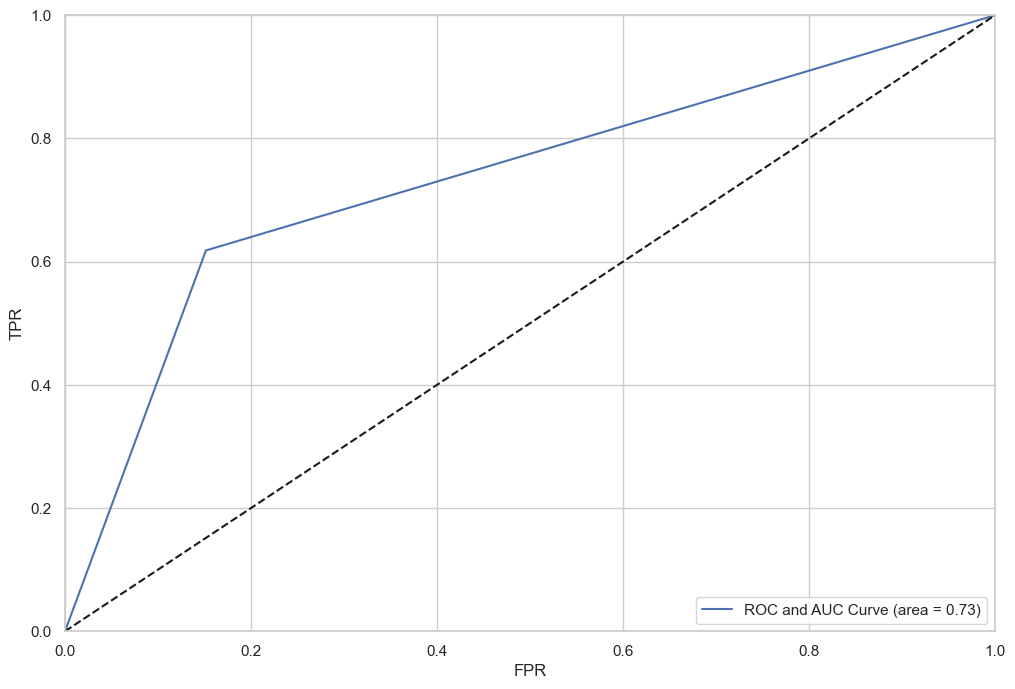

In [57]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'ROC and AUC Curve (area = %0.2f)' % logit_roc_under_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.show()

## Concluding: Since the model is showing good performance in the ROC-AUC Curve, the model using Random Forest with Train accuracy of 82% and Test accuracy of 76% and Cross Validation mean Accuracy scores for training and test data is 76%, Hence the model can be said to be performing well and can be used for deployment in production.

## Note: Since this is a medical dataset, the False Negative value should be as low as possible as we would not want to classify a person as non diabetic if they are actually diabetic.

In [58]:
# Model Predictions using random feature values:

def pred_diab(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    prediction = rfc.predict(scaler.transform([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]))
    if prediction == [1]:
        print('\n')
        return 'The patient is Diabetic'
    else:
        print('\n')
        return 'The patient is not diabetic'

In [59]:
# Model taking input from user:
Pregnancies = int(input("Enter the number of pregnancies of the patient: "))
Glucose = int(input("Enter the Plasma glucose concentration a 2 hours in an oral glucose tolerance test of the patient: "))
BloodPressure = int(input("Enter the Diastolic blood pressure (mm Hg) of the patient: "))
SkinThickness = int(input("Enter the Triceps skin fold thickness (mm) of the patient: "))
Insulin = int(input("Enter the 2-Hour serum insulin (mu U/ml) of the patient: "))
BMI = float(input("Enter the Body mass index (weight in kg/(height in m)^2) of the patient: "))
DiabetesPedigreeFunction = float(input("Enter the Diabetes pedigree function of the patient: "))
Age = int(input("Enter the Age (years) of the patient: "))

print(pred_diab(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age))

Enter the number of pregnancies of the patient: 5
Enter the Plasma glucose concentration a 2 hours in an oral glucose tolerance test of the patient: 155
Enter the Diastolic blood pressure (mm Hg) of the patient: 89
Enter the Triceps skin fold thickness (mm) of the patient: 32
Enter the 2-Hour serum insulin (mu U/ml) of the patient: 0
Enter the Body mass index (weight in kg/(height in m)^2) of the patient: 40.5
Enter the Diabetes pedigree function of the patient: 0.589
Enter the Age (years) of the patient: 51


The patient is Diabetic


In [60]:
# Model taking input from user:
Pregnancies = int(input("Enter the number of pregnancies of the patient: "))
Glucose = int(input("Enter the Plasma glucose concentration a 2 hours in an oral glucose tolerance test of the patient: "))
BloodPressure = int(input("Enter the Diastolic blood pressure (mm Hg) of the patient: "))
SkinThickness = int(input("Enter the Triceps skin fold thickness (mm) of the patient: "))
Insulin = int(input("Enter the 2-Hour serum insulin (mu U/ml) of the patient: "))
BMI = float(input("Enter the Body mass index (weight in kg/(height in m)^2) of the patient: "))
DiabetesPedigreeFunction = float(input("Enter the Diabetes pedigree function of the patient: "))
Age = int(input("Enter the Age (years) of the patient: "))

print(pred_diab(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age))

Enter the number of pregnancies of the patient: 1
Enter the Plasma glucose concentration a 2 hours in an oral glucose tolerance test of the patient: 90
Enter the Diastolic blood pressure (mm Hg) of the patient: 66
Enter the Triceps skin fold thickness (mm) of the patient: 23
Enter the 2-Hour serum insulin (mu U/ml) of the patient: 0
Enter the Body mass index (weight in kg/(height in m)^2) of the patient: 25.5
Enter the Diabetes pedigree function of the patient: 0.321
Enter the Age (years) of the patient: 32


The patient is not diabetic
